**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: Operaciones de Aprendizaje Automático**

Tecnológico de Monterrey

**Fase 1 – Procesamiento y Modelado Inicial**
En esta primera etapa aprenderás a trabajar con los datos y a construir tus primeros modelos:

* Realizar un análisis del problema y generar una propuesta de valor.
* Manipular y preparar datos.
* Explorar y preprocesar información.
* Aplicar técnicas de versionado para asegurar reproducibilidad y trazabilidad.
* Construir, ajustar y evaluar modelos de Machine Learning.

---

**EQUIPO 10**

**ALUMNOS:**

Gabriela Lizeth Moreno Hernández - A01796677

Alejandro Chávez Campos  -  AXXXXX

Carlos Armando Alcántar Sánchez - A01311747

Luis Fernando Caporal Montes de Oca  -  AXXXXX

Yamil Abraham Nechar Reyes - A01795726

In [38]:
# --- Librerías ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
# Configuración de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MLOPs/Semana3/dataset/"
os.chdir(DIR)

**1. Carga de Datos**

In [41]:
# Explicación:
# Se carga el dataset original para explorar la estructura y distribución de atributos.
# Esto permite identificar tipos de variables, su rango de valores y posibles problemas como desbalance o valores faltantes.
data_path = "insurance_company_modified.csv"

# Cargar solo una fila para contar cuántas columnas hay
with open(data_path, "r") as f:
    first_line = f.readline()
num_cols = len(first_line.strip().split(","))

# Crear nombres dinámicos
column_names = [f"A{i}" for i in range(1, num_cols + 1)]

df = pd.read_csv(data_path, sep=",", header=None, names=column_names)

# Remove the first row
df = df.iloc[1:].copy()

print("Dimensiones del dataset:", df.shape)
print(df)


Dimensiones del dataset: (5937, 87)
          A1     A2     A3   A4      A5     A6   A7     A8   A9    A10  ...  \
1      37.0     1.0    2.0  2.0     8.0    1.0  4.0      ?  4.0   6.0   ...   
2       37.0    1.0    2.0  2.0     8.0    0.0  4.0    2.0  4.0    3.0  ...   
3        9.0    1.0    3.0  3.0     3.0    2.0  3.0   2.0   4.0    5.0  ...   
4       40.0    1.0    4.0  2.0    10.0    1.0  4.0    1.0  4.0    7.0  ...   
5      23.0     1.0    2.0  1.0     5.0    0.0  5.0    0.0  5.0    0.0  ...   
...      ...    ...    ...  ...     ...    ...  ...    ...  ...    ...  ...   
5933     NaN    1.0    2.0  2.0     5.0    0.0  4.0    2.0  4.0    0.0  ...   
5934    41.0  449.0   3.0   3.0   10.0     0.0  4.0    1.0  4.0    7.0  ...   
5935     2.0   1.0     2.0  3.0     1.0    1.0  5.0    1.0  3.0    5.0  ...   
5936     8.0    1.0    2.0  4.0     2.0   0.0   4.0    0.0  5.0    7.0  ...   
5937    24.0    1.0    4.0  2.0     5.0   0.0   5.0    1.0  4.0  260.0  ...   

        A78    

1.1 Información General del Dataset

In [42]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 1 to 5937
Data columns (total 87 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      5869 non-null   object
 1   A2      5864 non-null   object
 2   A3      5873 non-null   object
 3   A4      5868 non-null   object
 4   A5      5877 non-null   object
 5   A6      5863 non-null   object
 6   A7      5858 non-null   object
 7   A8      5874 non-null   object
 8   A9      5875 non-null   object
 9   A10     5876 non-null   object
 10  A11     5871 non-null   object
 11  A12     5871 non-null   object
 12  A13     5871 non-null   object
 13  A14     5852 non-null   object
 14  A15     5877 non-null   object
 15  A16     5866 non-null   object
 16  A17     5874 non-null   object
 17  A18     5874 non-null   object
 18  A19     5855 non-null   object
 19  A20     5870 non-null   object
 20  A21     5859 non-null   object
 21  A22     5852 non-null   obj

1.2 Identificar Valores nulos

In [43]:
#df = df.dropna()
print("Valores nulos por columna:")
print(df.isna().sum())
print("\n")
total_filas = len(df)
for col, nulos in df.isna().sum().items():
    if nulos > 0:
        porcentaje = (nulos / total_filas) * 100
        print(f"Columna '{col}': {nulos} nulos ({porcentaje:.2f}%)")

Valores nulos por columna:
A1      68
A2      73
A3      64
A4      69
A5      60
      ... 
A83     48
A84     61
A85     62
A86     79
A87    593
Length: 87, dtype: int64


Columna 'A1': 68 nulos (1.15%)
Columna 'A2': 73 nulos (1.23%)
Columna 'A3': 64 nulos (1.08%)
Columna 'A4': 69 nulos (1.16%)
Columna 'A5': 60 nulos (1.01%)
Columna 'A6': 74 nulos (1.25%)
Columna 'A7': 79 nulos (1.33%)
Columna 'A8': 63 nulos (1.06%)
Columna 'A9': 62 nulos (1.04%)
Columna 'A10': 61 nulos (1.03%)
Columna 'A11': 66 nulos (1.11%)
Columna 'A12': 66 nulos (1.11%)
Columna 'A13': 66 nulos (1.11%)
Columna 'A14': 85 nulos (1.43%)
Columna 'A15': 60 nulos (1.01%)
Columna 'A16': 71 nulos (1.20%)
Columna 'A17': 63 nulos (1.06%)
Columna 'A18': 63 nulos (1.06%)
Columna 'A19': 82 nulos (1.38%)
Columna 'A20': 67 nulos (1.13%)
Columna 'A21': 78 nulos (1.31%)
Columna 'A22': 85 nulos (1.43%)
Columna 'A23': 52 nulos (0.88%)
Columna 'A24': 73 nulos (1.23%)
Columna 'A25': 77 nulos (1.30%)
Columna 'A26': 74 nulos (1.25%)
Co

1.1.1 Limpieza de Datos

Eliminaremos la ultima columna dado que tiene una alta cardinalidad y parece no poseer un poder de generalización:

In [44]:
df.drop(df.columns[-1], axis=1, inplace=True)

1.1.1.1 Tratamiento de Valores Nulos

In [45]:
#Numeric columns -> Mediana
#df[col].fillna(df[col].median()))

#Categoric columns -> Moda
#df[col].fillna(df[col].mode()[0])

#Para la variable objetivo deberemos eliminar para evitar introducir sesgo
# Nombre de la variable objetivo
target = "A86"

# Eliminar filas donde el target sea nulo
df = df.dropna(subset=[target])


# Separar columnas por tipo
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object", "category"]).columns

#PANDAS
# Imputar numéricas con la mediana
#for col in num_cols:
#    df[col].fillna(df[col].median(), inplace=True)

# Imputar categóricas con la moda
#for col in cat_cols:
#    if df[col].isna().sum() > 0:  # solo si tiene nulos
#        moda = df[col].mode()[0]
#        df[col].fillna(moda, inplace=True)
        ##df.method({col: moda}, inplace=True)
        ##df[col] = df[col].method(moda)

#IMPUTAR CON SCIKIT-LEARN
# Definir imputadores
imputer_num = SimpleImputer(strategy="median")
imputer_cat = SimpleImputer(strategy="most_frequent")

# Construir transformador por tipo de columna
preprocessor = ColumnTransformer(
    transformers=[
        ("num", imputer_num, num_cols),
        ("cat", imputer_cat, cat_cols)
    ]
)
# Aplicar al DataFrame
df_imputed = preprocessor.fit_transform(df)

# Reconstruir DataFrame con nombres de columnas originales
df_imputed = pd.DataFrame(df_imputed, columns=num_cols.tolist() + cat_cols.tolist())
df = df_imputed

print("Imputación completada.")

Imputación completada.


Se comprobara que no existan nulos:

In [46]:
#df = df.dropna()
print("Valores nulos por columna:")
print(df.isna().sum())
print("\n")
total_filas = len(df)
for col, nulos in df.isna().sum().items():
    if nulos > 0:
        porcentaje = (nulos / total_filas) * 100
        print(f"Columna '{col}': {nulos} nulos ({porcentaje:.2f}%)")

Valores nulos por columna:
A1     0
A2     0
A3     0
A4     0
A5     0
      ..
A82    0
A83    0
A84    0
A85    0
A86    0
Length: 86, dtype: int64




Se comprueba que la dimensionalidad concuerde con el numero de registros que no eran nulos para la variable objetivo:

In [47]:
print("Información general del dataset:")
print(df.info())

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      5858 non-null   object
 1   A2      5858 non-null   object
 2   A3      5858 non-null   object
 3   A4      5858 non-null   object
 4   A5      5858 non-null   object
 5   A6      5858 non-null   object
 6   A7      5858 non-null   object
 7   A8      5858 non-null   object
 8   A9      5858 non-null   object
 9   A10     5858 non-null   object
 10  A11     5858 non-null   object
 11  A12     5858 non-null   object
 12  A13     5858 non-null   object
 13  A14     5858 non-null   object
 14  A15     5858 non-null   object
 15  A16     5858 non-null   object
 16  A17     5858 non-null   object
 17  A18     5858 non-null   object
 18  A19     5858 non-null   object
 19  A20     5858 non-null   object
 20  A21     5858 non-null   object
 21  A22     5858 non-null   obj

1.3 Estadisticas descriptivas

In [48]:
print("\nEstadísticas descriptivas:")
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].describe())
#df.describe(include="all")


Estadísticas descriptivas:

Columna: A1
count     5858
unique     152
top       33.0
freq       827
Name: A1, dtype: object

Columna: A2
count     5858
unique      79
top        1.0
freq      4954
Name: A2, dtype: object

Columna: A3
count     5858
unique      73
top        3.0
freq      2547
Name: A3, dtype: object

Columna: A4
count     5858
unique      85
top        3.0
freq      2839
Name: A4, dtype: object

Columna: A5
count     5858
unique      79
top        8.0
freq      1517
Name: A5, dtype: object

Columna: A6
count     5858
unique      49
top        0.0
freq      3086
Name: A6, dtype: object

Columna: A7
count     5858
unique      79
top        4.0
freq      1562
Name: A7, dtype: object

Columna: A8
count     5858
unique      64
top        0.0
freq      1948
Name: A8, dtype: object

Columna: A9
count     5858
unique      64
top        3.0
freq      1430
Name: A9, dtype: object

Columna: A10
count     5858
unique      88
top        7.0
freq      1614
Name: A10, dtype: object


Dado que el dataset esta modificado, asumiremos que no conocemos las columnas y haremos un análisis exploratorio para conocer las 5 primerpos resultados y los unique values de esa columna con ello definiremos de que tipo son ante de obtener las estadísticas de cada columna.

In [49]:
for col in df.columns:
    print(f"\nColumna: {col}")
    print(df[col].head(5))
    print("Tipo original:", df[col].dtype)
    print("Número de valores únicos:", df[col].nunique())



Columna: A1
0     37.0 
1      37.0
2       9.0
3      40.0
4     23.0 
Name: A1, dtype: object
Tipo original: object
Número de valores únicos: 152

Columna: A2
0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: A2, dtype: object
Tipo original: object
Número de valores únicos: 79

Columna: A3
0    2.0
1    2.0
2    3.0
3    4.0
4    2.0
Name: A3, dtype: object
Tipo original: object
Número de valores únicos: 73

Columna: A4
0    2.0
1    2.0
2    3.0
3    2.0
4    1.0
Name: A4, dtype: object
Tipo original: object
Número de valores únicos: 85

Columna: A5
0     8.0
1     8.0
2     3.0
3    10.0
4     5.0
Name: A5, dtype: object
Tipo original: object
Número de valores únicos: 79

Columna: A6
0    1.0
1    0.0
2    2.0
3    1.0
4    0.0
Name: A6, dtype: object
Tipo original: object
Número de valores únicos: 49

Columna: A7
0    4.0
1    4.0
2    3.0
3    4.0
4    5.0
Name: A7, dtype: object
Tipo original: object
Número de valores únicos: 79

Columna: A8
0        ?
1      2.0
2     2.0 
3 

In [50]:
#df["A86"].value_counts().head(20)
conteo = df[target].value_counts()
#conteo.head(30)
conteo

,count
A86,
0.0,5173
1.0,333
0.0,282
1.0,18
invalid,17
error,7
NAN,4
668.0,1
?,1


Se observa que la variable objetivo contiene una cantidad de valores que no corresponden con las categorias esperadas.

Por lo tanto sera necesario **eliminar** filas inválidas.

In [51]:
expected = ["0", "1"]
#df = df[df[target].isin(expected)]
#df[target].value_counts()
#df.shape

#valid_mask = df[target].isin([0, 1])

#df_valid = df[valid_mask].copy()      # dataset limpio
#df_invalid = df[~valid_mask].copy()   # dataset con registros incorrectos

#print(f"Registros válidos: {len(df_valid)}")
#print(f"Registros inválidos eliminados: {len(df_invalid)}")

# 1. Normalizar los valores 0.0 -> 0 y 1.0 -> 1
df[target] = pd.to_numeric(df[target], errors="coerce")  # convierte strings numéricos a float
df[target] = df[target].round(0).astype("Int64")         # redondea y convierte a entero nullable

# 2. Filtrar solo los valores válidos (0 y 1)
df = df[df[target].isin([0, 1])]

# 3️. (Opcional) convertir a tipo categórico
#df[target] = df[target].astype("category")

# 4️. Verificar conteo final
print(df[target].value_counts())

A86
0    5455
1     351
Name: count, dtype: Int64


In [52]:
df.shape

(5806, 86)

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5806 entries, 0 to 5857
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A1      5806 non-null   object
 1   A2      5806 non-null   object
 2   A3      5806 non-null   object
 3   A4      5806 non-null   object
 4   A5      5806 non-null   object
 5   A6      5806 non-null   object
 6   A7      5806 non-null   object
 7   A8      5806 non-null   object
 8   A9      5806 non-null   object
 9   A10     5806 non-null   object
 10  A11     5806 non-null   object
 11  A12     5806 non-null   object
 12  A13     5806 non-null   object
 13  A14     5806 non-null   object
 14  A15     5806 non-null   object
 15  A16     5806 non-null   object
 16  A17     5806 non-null   object
 17  A18     5806 non-null   object
 18  A19     5806 non-null   object
 19  A20     5806 non-null   object
 20  A21     5806 non-null   object
 21  A22     5806 non-null   object
 22  A23     5806 non-null   objec

Analizaremos si la mayoria de los datos de las columnas son de algun tipo para transformarlas:

In [54]:
def analityc_convertion_columns(df, fecha_threshold=0.5, cat_threshold=0.1):
    """
    Identifica el tipo de columnas partiendo del tipo object  para saber si es numéricas, fechas o categóricas,
    EXCLUYENDO la variable objetivo (target).

    Hace enfasis en las columnas con mayor cardilidad pues pueden ser de texto libre.
    """
    for col in df.columns:
        if df[col].dtype == "object":
            # 1. Identifica numérico
            num_col = pd.to_numeric(df[col], errors="coerce")
            if num_col.notna().mean() > 0.9:  # si >90% son convertibles
                print(f" Columna '{col}' detectada como NUMERICA")
                continue

            # 2. Identifica fecha
            fecha_col = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)
            if fecha_col.notna().mean() > fecha_threshold:
                print(f" Columna '{col}' detectada como FECHA")
                continue

            # 3. Identifica Categorica vs texto libre
            n_unique = df[col].nunique(dropna=True)
            total = len(df[col])
            if n_unique / total < cat_threshold:
                print(f" Columna '{col}' detectada como CATEGORICA")
            else:
                print(f" Columna '{col}' detectada como TEXTO LIBRE / ALTA CARDINALIDAD")

    return

In [55]:
# Aplicar conversión automática solo a las features
analityc_convertion_columns(df)

print("\nSe analizaron posibles tipos......")


 Columna 'A1' detectada como NUMERICA
 Columna 'A2' detectada como NUMERICA
 Columna 'A3' detectada como NUMERICA
 Columna 'A4' detectada como NUMERICA
 Columna 'A5' detectada como NUMERICA
 Columna 'A6' detectada como NUMERICA
 Columna 'A7' detectada como NUMERICA
 Columna 'A8' detectada como NUMERICA
 Columna 'A9' detectada como NUMERICA
 Columna 'A10' detectada como NUMERICA
 Columna 'A11' detectada como NUMERICA
 Columna 'A12' detectada como NUMERICA
 Columna 'A13' detectada como NUMERICA
 Columna 'A14' detectada como NUMERICA
 Columna 'A15' detectada como NUMERICA
 Columna 'A16' detectada como NUMERICA
 Columna 'A17' detectada como NUMERICA
 Columna 'A18' detectada como NUMERICA
 Columna 'A19' detectada como NUMERICA
 Columna 'A20' detectada como NUMERICA
 Columna 'A21' detectada como NUMERICA
 Columna 'A22' detectada como NUMERICA
 Columna 'A23' detectada como NUMERICA
 Columna 'A24' detectada como NUMERICA
 Columna 'A25' detectada como NUMERICA
 Columna 'A26' detectada como NUME

ANALIZAR LAS COLUMNAS DE ALTA CARDILADIDAD

In [56]:
print(f"Valores únicos: {df[col].nunique()}")
#df.groupby(col)[target].mean().sort_values(ascending=False).head(10)

Valores únicos: 2


In [57]:
def auto_convert_columns(df, target, fecha_threshold=0.5, cat_threshold=0.1):
    """
    Convierte automáticamente columnas de tipo object a numéricas, fechas o categóricas,
    EXCLUYENDO la variable objetivo (target).
    """
    for col in df.columns:
        if col == target:  # Excluir la variable objetivo
            continue

        if df[col].dtype == "object":
            # 1. Intentar convertir a numérico
            num_col = pd.to_numeric(df[col], errors="coerce")
            if num_col.notna().mean() > 0.9:  # si >90% son convertibles
                df[col] = num_col
                continue

            # 2. Intentar convertir a fecha
            fecha_col = pd.to_datetime(df[col], errors="coerce", infer_datetime_format=True)
            if fecha_col.notna().mean() > fecha_threshold:
                df[col] = fecha_col
                continue

            # 3. Detectar categóricas vs texto libre
            n_unique = df[col].nunique(dropna=True)
            total = len(df[col])
            if n_unique / total < cat_threshold:
                df[col] = df[col].astype("category")
            else:
                print(f" Columna '{col}' detectada como TEXTO LIBRE / ALTA CARDINALIDAD")

    return df

In [58]:
# Eliminar filas con target nulo
#df = df.dropna(subset=[target])

# Aplicar conversión automática solo a las features
df = auto_convert_columns(df, target=target)

print("\nTipos de datos después de conversión automática (sin tocar el target):")
print(df.dtypes)

print("\nTipos de datos después de conversión automática:")
print(df.dtypes)



Tipos de datos después de conversión automática (sin tocar el target):
A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
        ...   
A82    float64
A83    float64
A84    float64
A85    float64
A86      Int64
Length: 86, dtype: object

Tipos de datos después de conversión automática:
A1     float64
A2     float64
A3     float64
A4     float64
A5     float64
        ...   
A82    float64
A83    float64
A84    float64
A85    float64
A86      Int64
Length: 86, dtype: object


/tmp/ipython-input-2799414720.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = num_col


In [59]:
print("Información general del dataset cambiando todas las columnas tipo OBJETC:")
print(df.info())

Información general del dataset cambiando todas las columnas tipo OBJETC:
<class 'pandas.core.frame.DataFrame'>
Index: 5806 entries, 0 to 5857
Data columns (total 86 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      5786 non-null   float64
 1   A2      5783 non-null   float64
 2   A3      5784 non-null   float64
 3   A4      5782 non-null   float64
 4   A5      5780 non-null   float64
 5   A6      5785 non-null   float64
 6   A7      5784 non-null   float64
 7   A8      5789 non-null   float64
 8   A9      5787 non-null   float64
 9   A10     5787 non-null   float64
 10  A11     5784 non-null   float64
 11  A12     5785 non-null   float64
 12  A13     5787 non-null   float64
 13  A14     5784 non-null   float64
 14  A15     5782 non-null   float64
 15  A16     5788 non-null   float64
 16  A17     5792 non-null   float64
 17  A18     5781 non-null   float64
 18  A19     5789 non-null   float64
 19  A20     5781 non-null   float64
 20  A21  

1.4 Distribucion de variablers numéricas

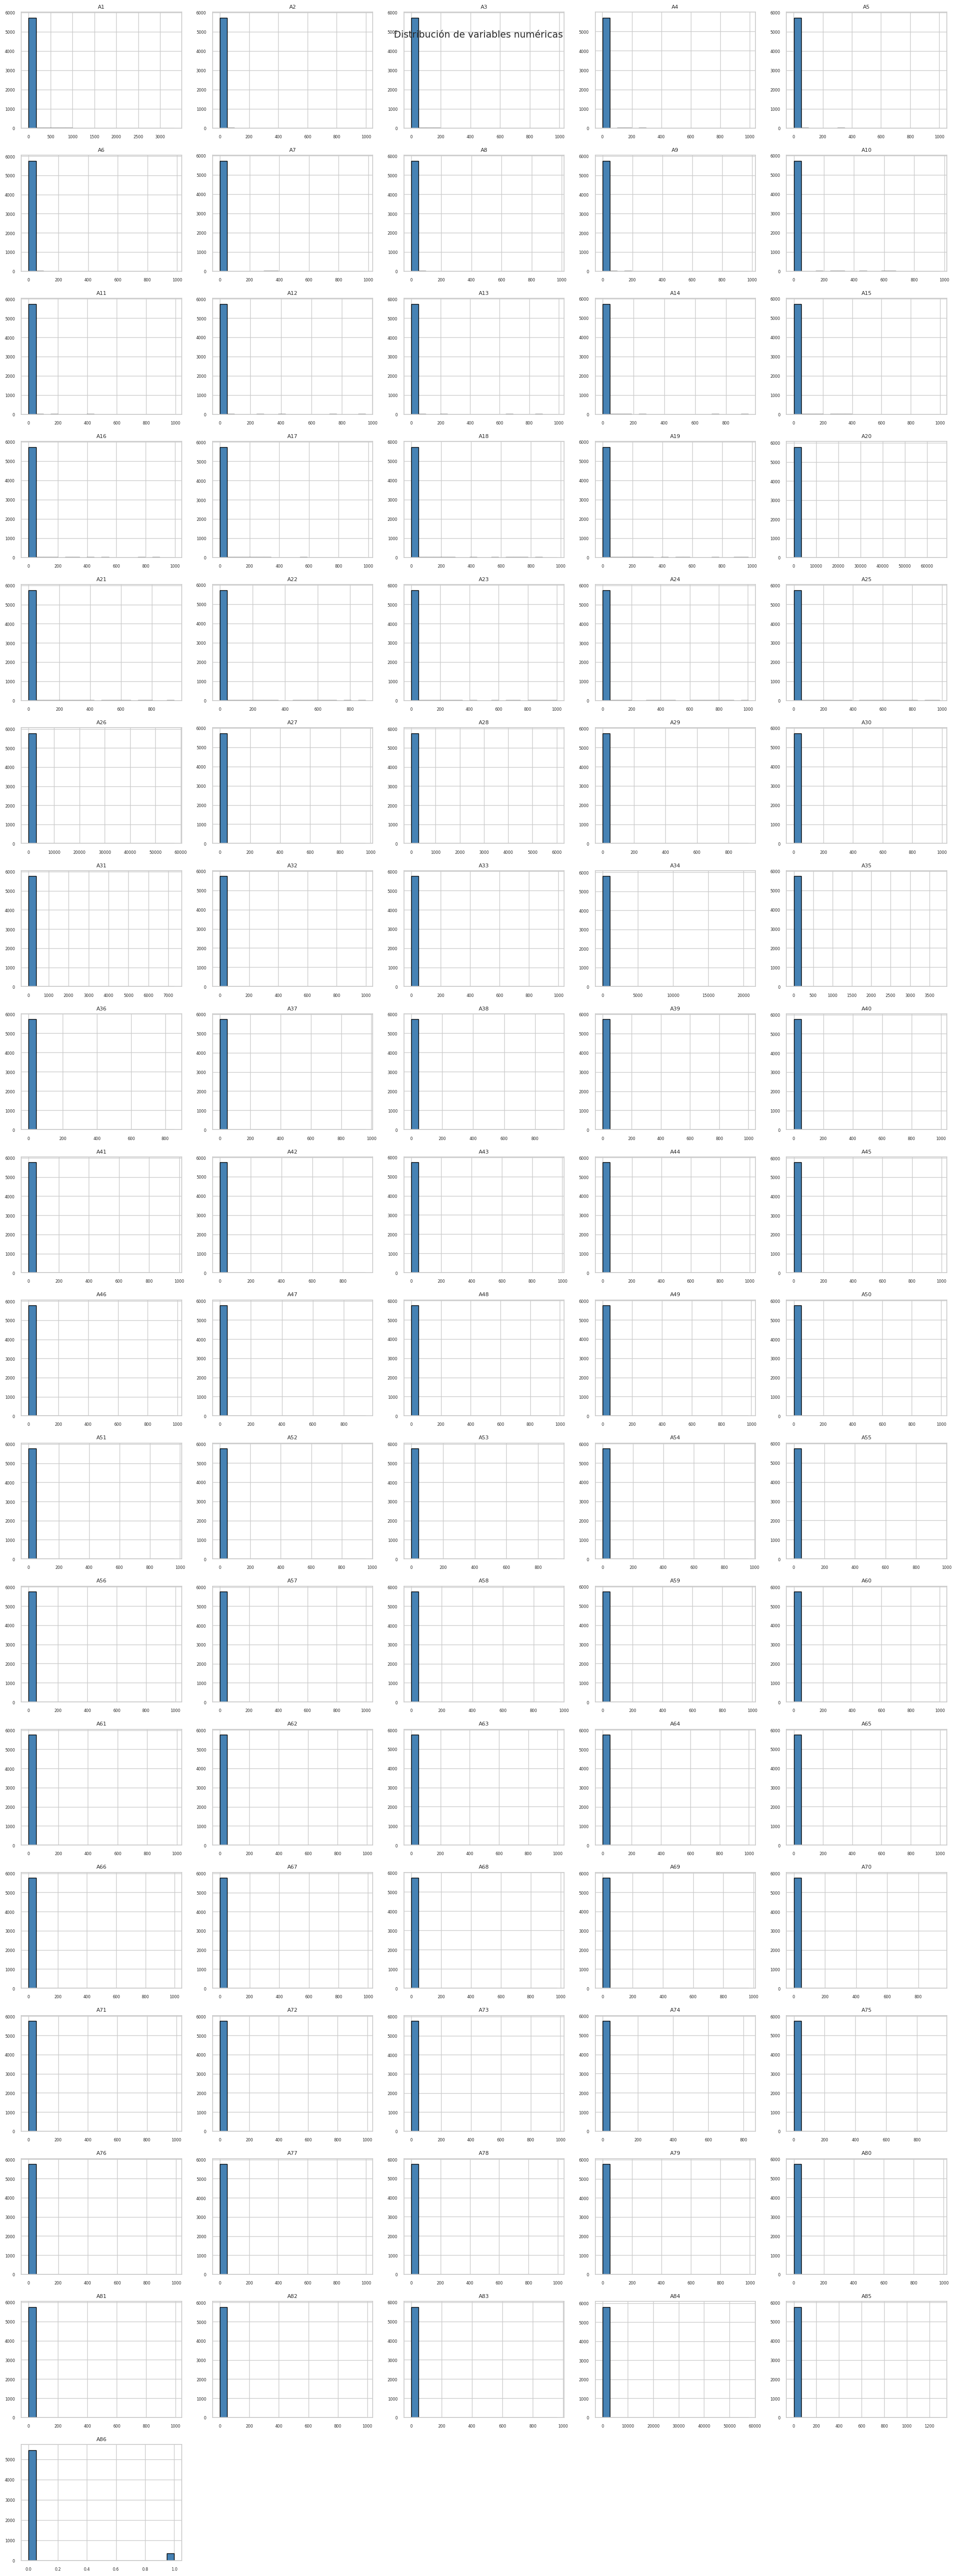

In [60]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
#df[num_cols].hist(bins=20, figsize=(18, 15))
#plt.suptitle("Distribución de variables numéricas", fontsize=16)
#plt.show()

cols = 5
rows = math.ceil(len(num_cols) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))  # ancho fijo, alto proporcional
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col], bins=20, color="steelblue", edgecolor="black")
    axes[i].set_title(col, fontsize=8)   # títulos pequeños
    axes[i].tick_params(axis="x", labelsize=6)  # ejes pequeños
    axes[i].tick_params(axis="y", labelsize=6)

# Eliminar subplots vacíos si sobran
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distribución de variables numéricas", fontsize=14)
plt.tight_layout()
plt.show()

1.4.1 Detección de outliners en variables numéricas

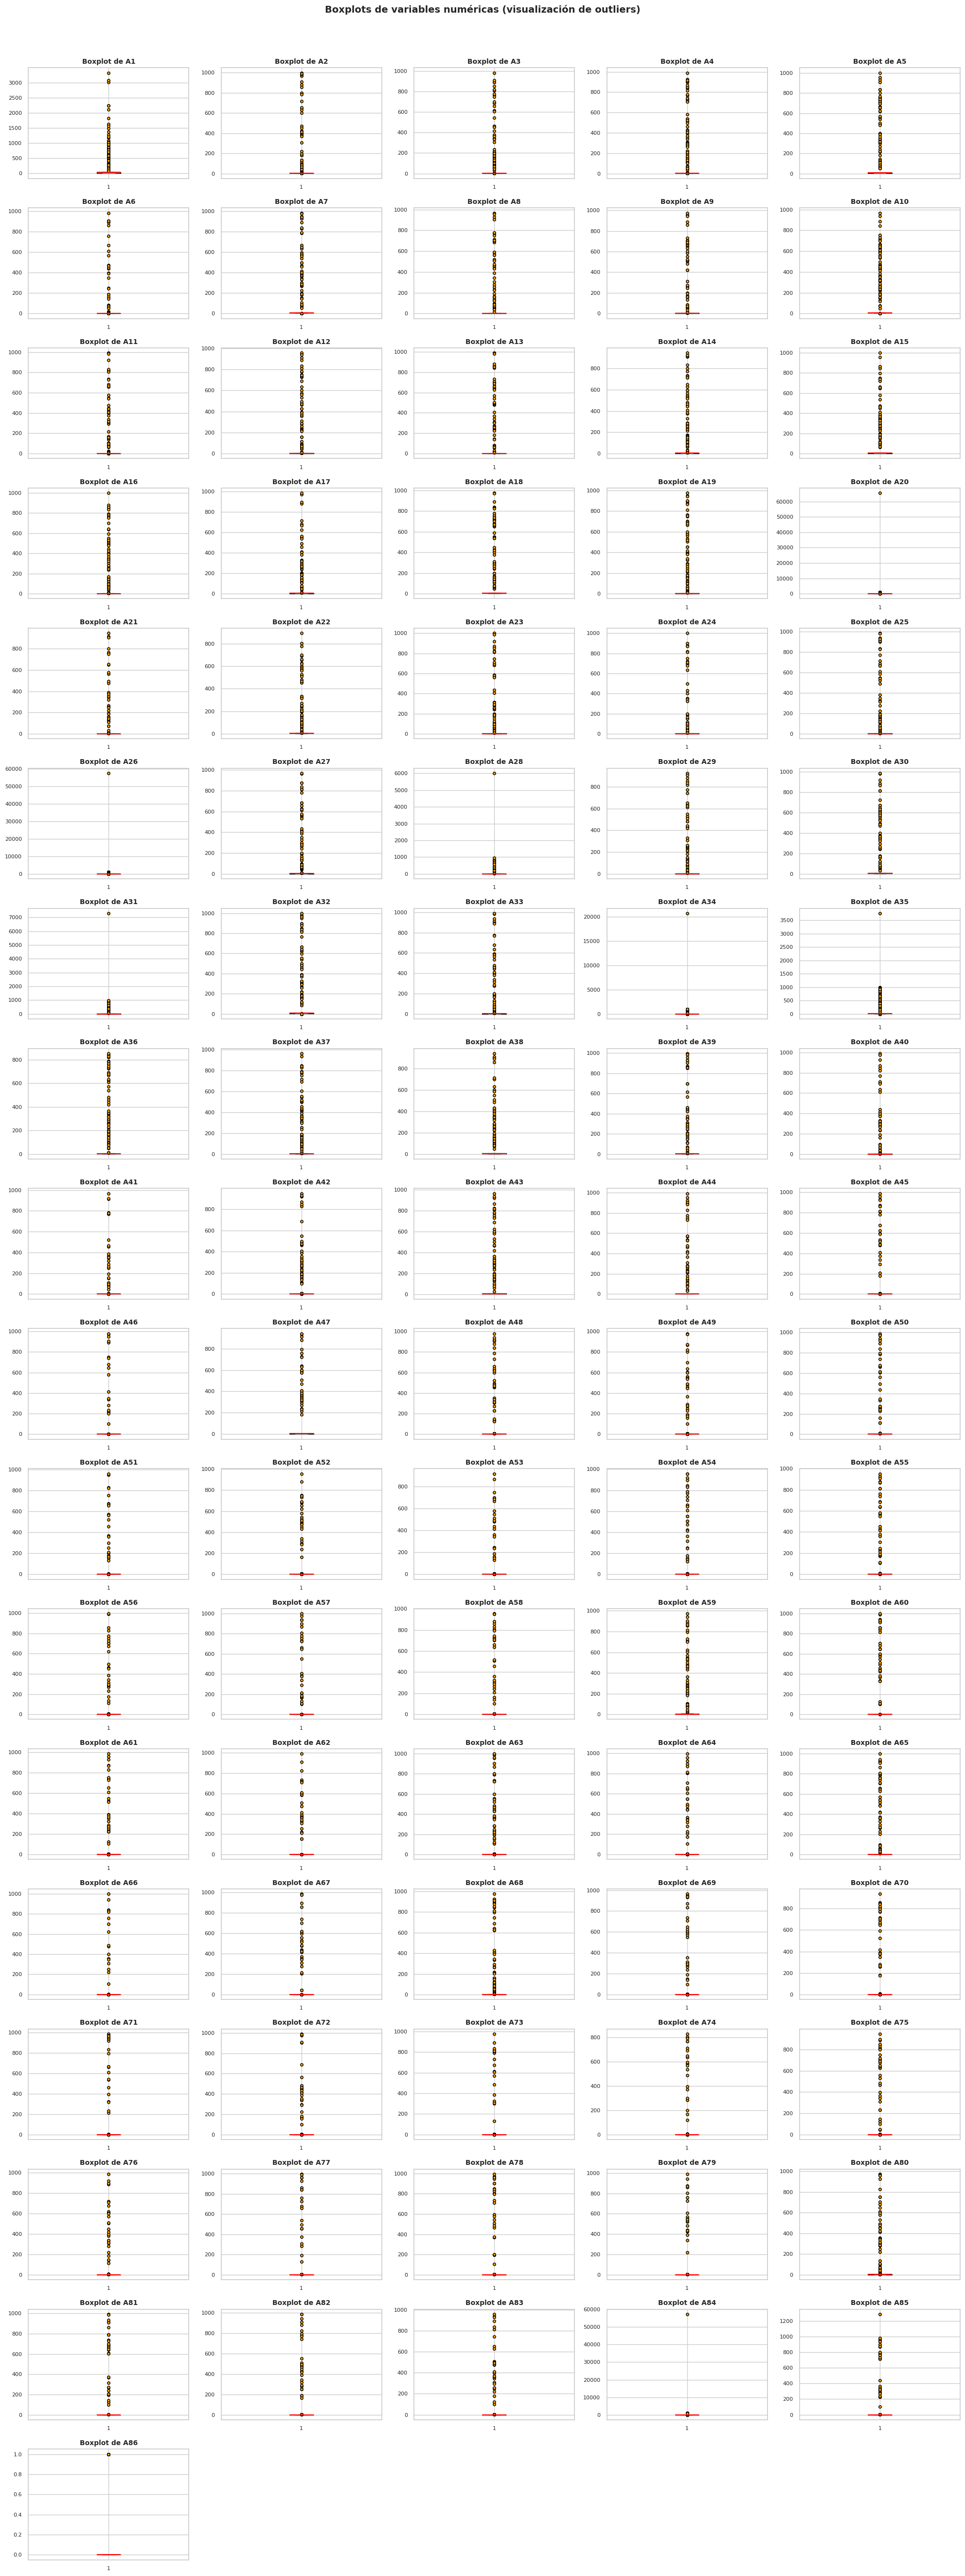

In [61]:
#for col in num_cols:#[:6]:
 #   sns.boxplot(x=df[col])
  #  plt.title(f"Boxplot de {col}")
   # plt.show()

# Crear figura y ejes
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 3))
axes = axes.flatten()

# Generar un boxplot por cada columna numérica
for i, col in enumerate(num_cols):
    axes[i].boxplot(df[col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor='lightblue', color='black'),
                    medianprops=dict(color='red', linewidth=1.5),
                    whiskerprops=dict(color='gray'),
                    capprops=dict(color='gray'),
                    flierprops=dict(marker='o', markerfacecolor='orange', markersize=4, linestyle='none'))

    axes[i].set_title(f"Boxplot de {col}", fontsize=10, fontweight="bold")
    axes[i].tick_params(axis="x", labelsize=8)
    axes[i].tick_params(axis="y", labelsize=8)

# Eliminar subplots vacíos si sobran
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Título general
fig.suptitle("Boxplots de variables numéricas (visualización de outliers)", fontsize=14, fontweight="bold")

# Ajustar espaciado
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


1.5 Correlación entre variables numéricas

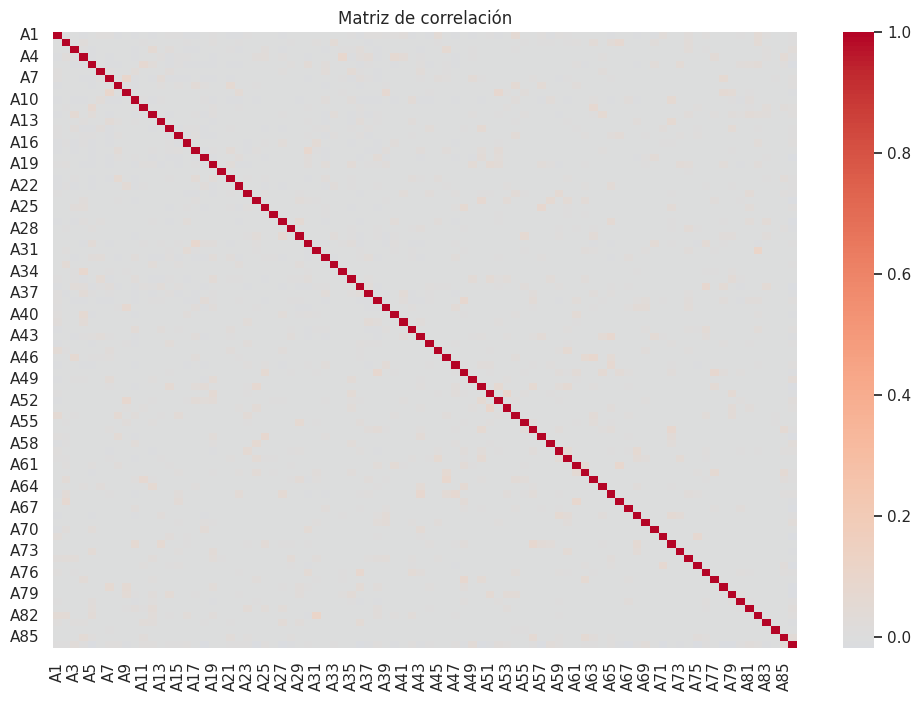

In [62]:
# Al contar con un número grande de features, se meustra el heatmap consolidado, pero se mostrará segmentado para propiciar el análisis
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de correlación")
plt.show()

In [63]:
# Filtrar correlaciones fuertes (|r| > 0.7 y != 1.0)

#strong_corr = corr[(corr.abs() > 0.7) & (corr != 1.0)]
#strong_corr.dropna(how="all", axis=0).dropna(how="all", axis=1)

strong_corr = corr[(corr.abs() > 0.7) & (corr != 1.0)]
strong_corr = strong_corr.dropna(how="all", axis=0).dropna(how="all", axis=1)

# Crear lista de correlaciones por feature
correlation_list = []

for col in strong_corr.columns:
    correlated_features = strong_corr[col].dropna()
    for feat, value in correlated_features.items():
        correlation_list.append({
            "Feature": col,
            "Correlated_Feature": feat,
            "Correlation": value
        })

# Convertir a DataFrame
correlation_df = pd.DataFrame(correlation_list)

# Ordenar por nombre de columna (Feature) alfabéticamente
#correlation_df = correlation_df.sort_values(by="Feature").reset_index(drop=True)
correlation_df.reset_index(drop=True, inplace=True)

#correlation_df.head(3)
correlation_df

""


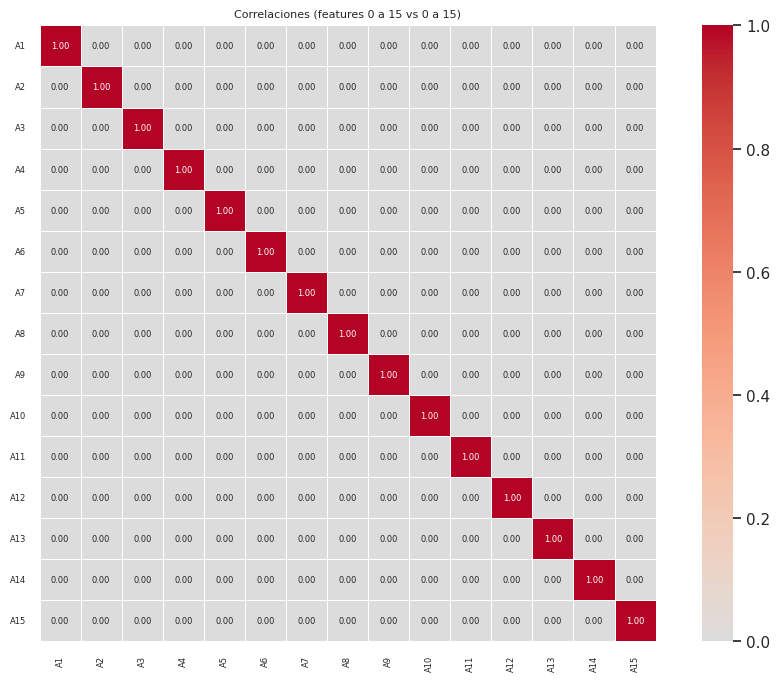

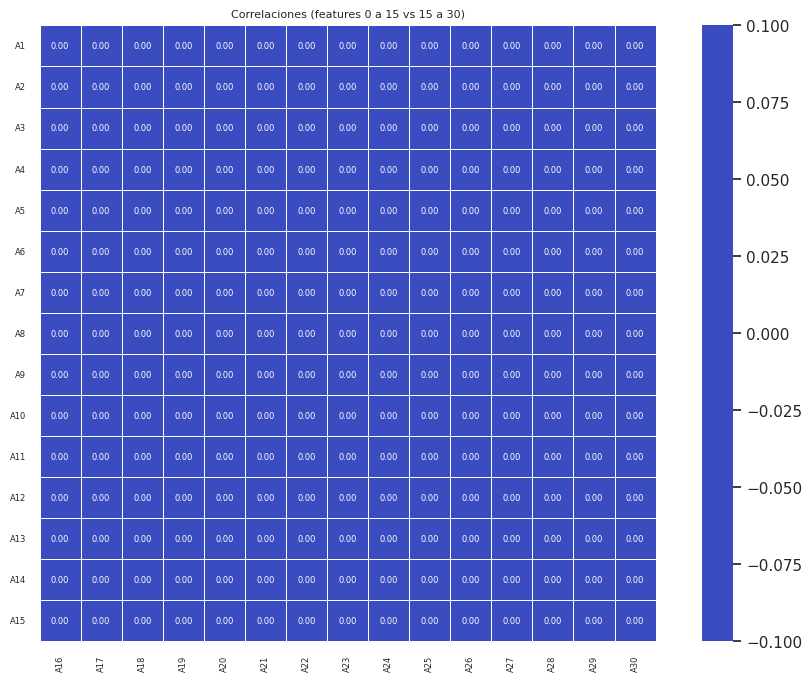

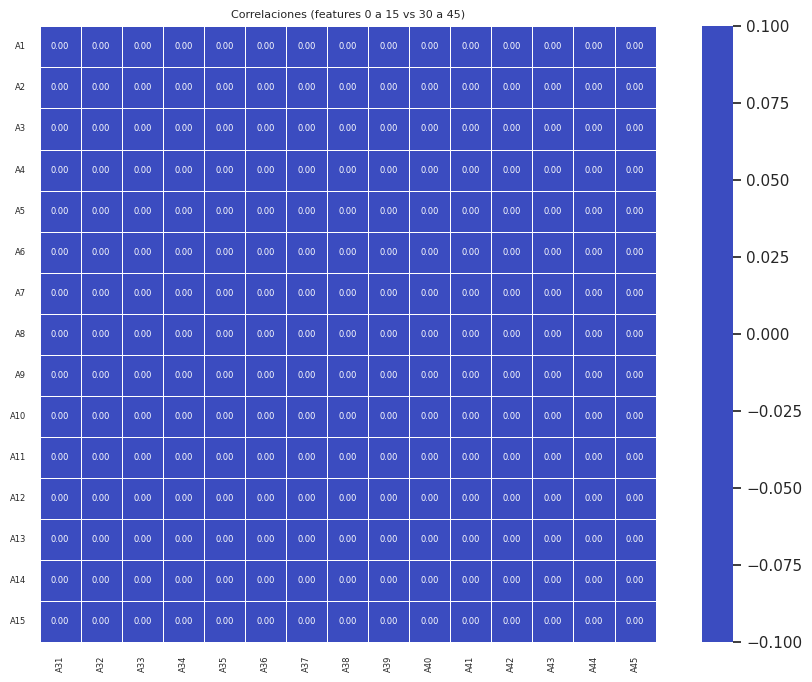

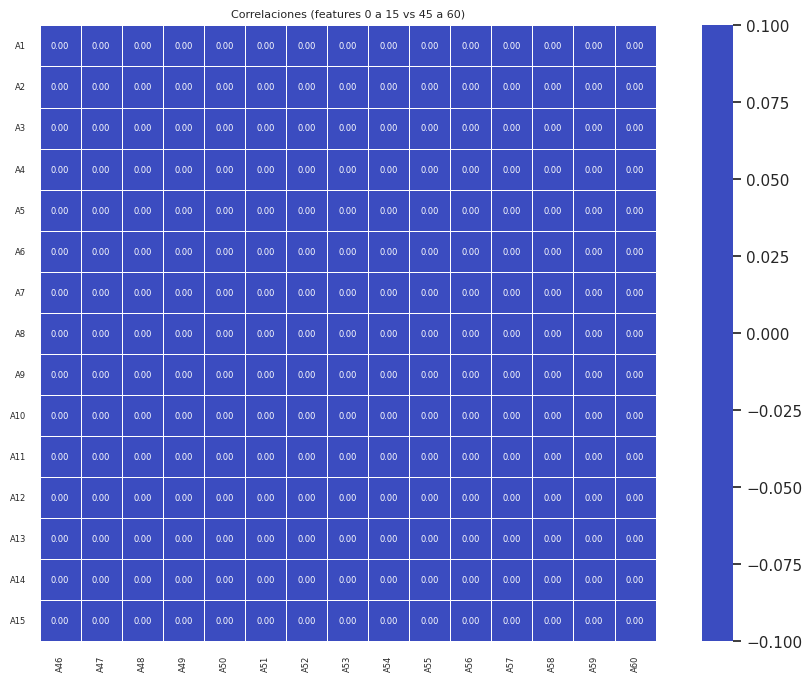

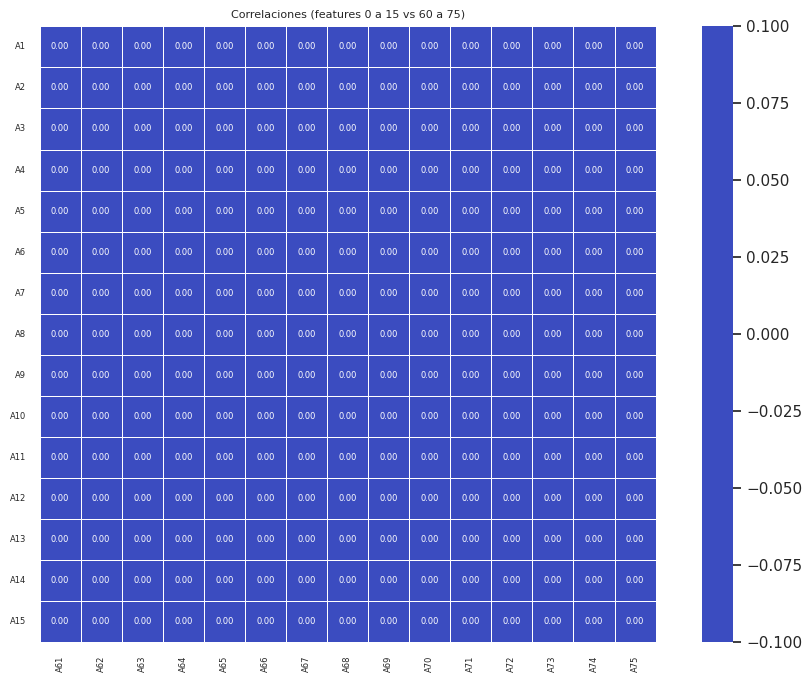

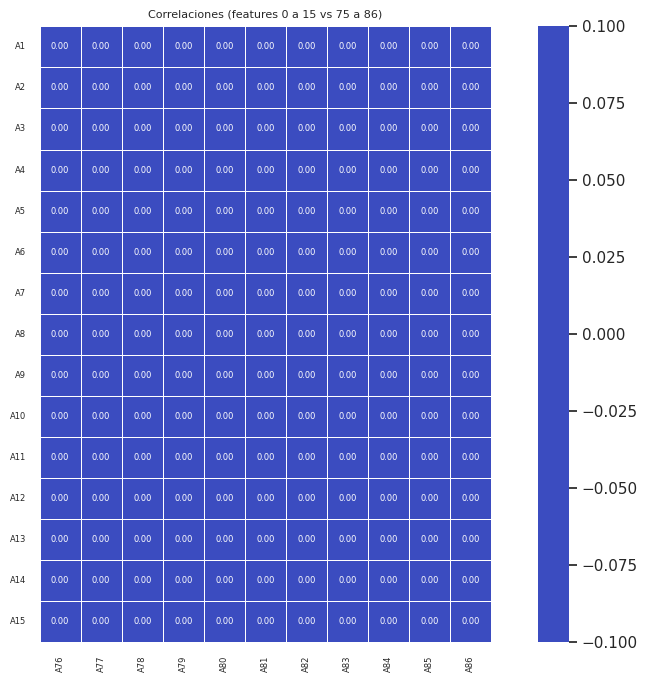

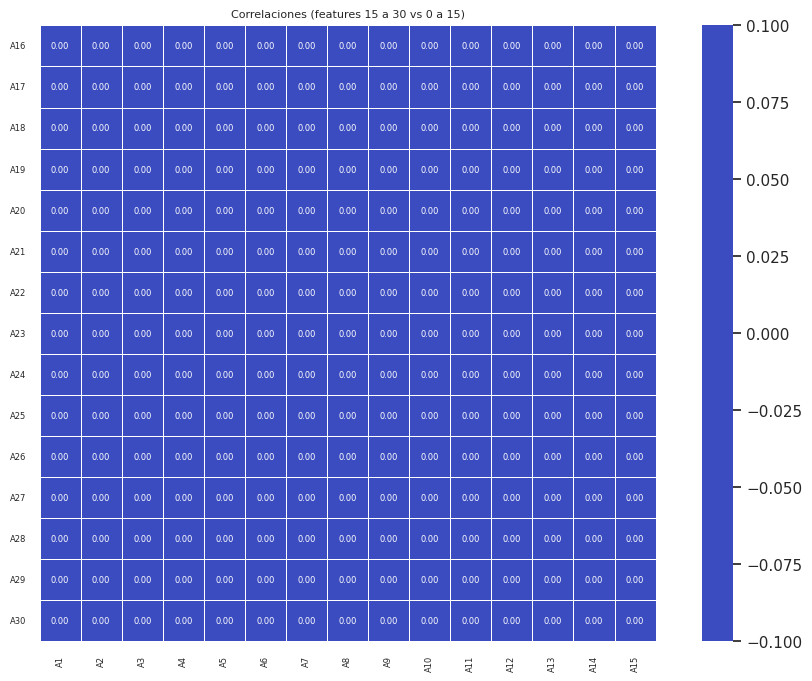

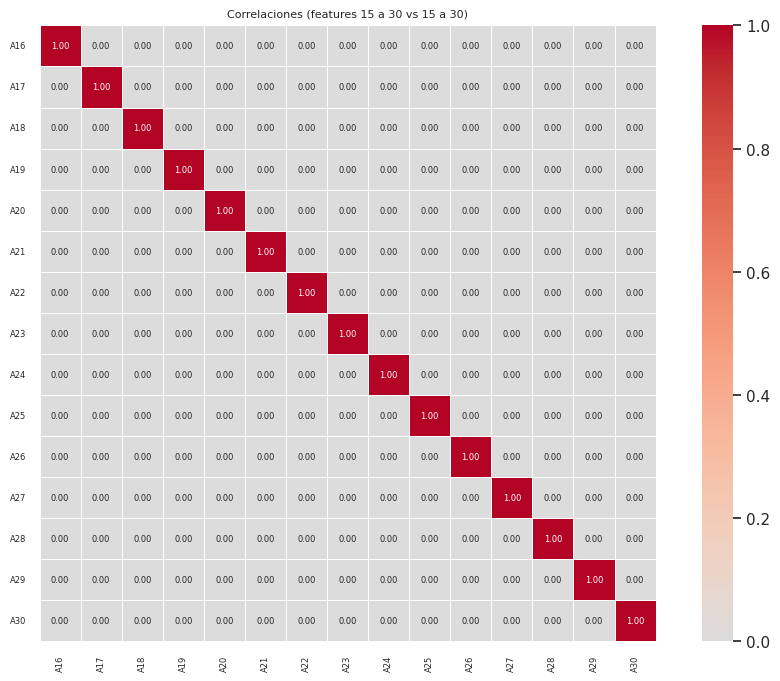

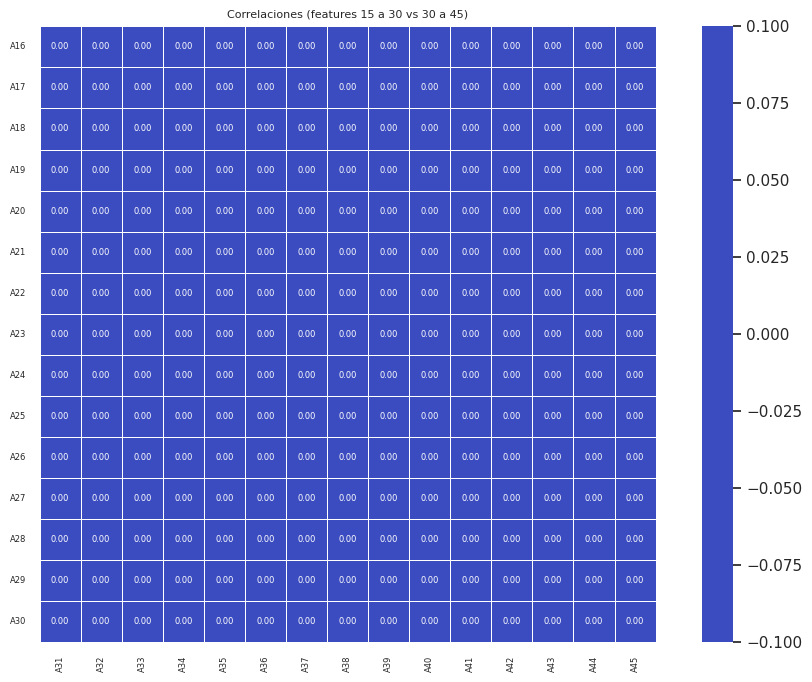

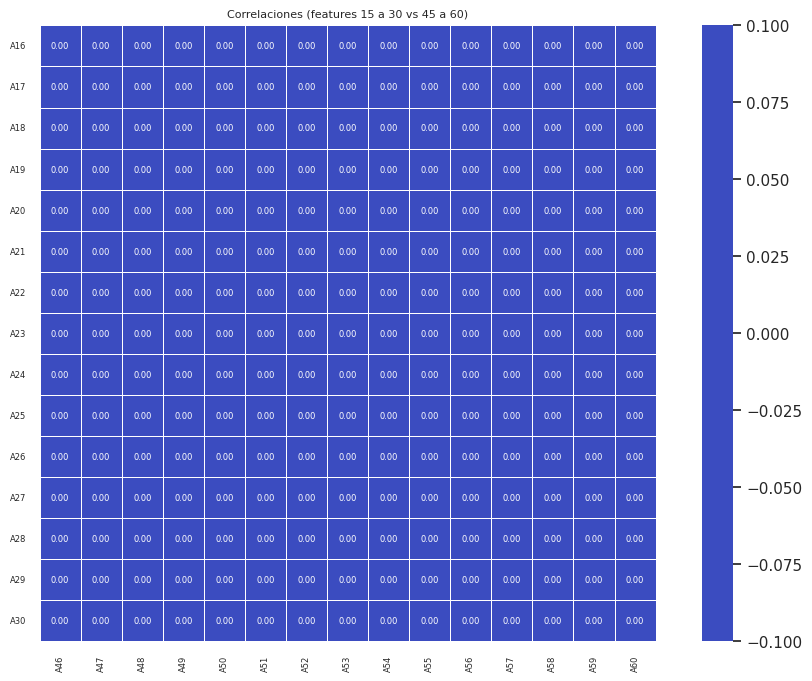

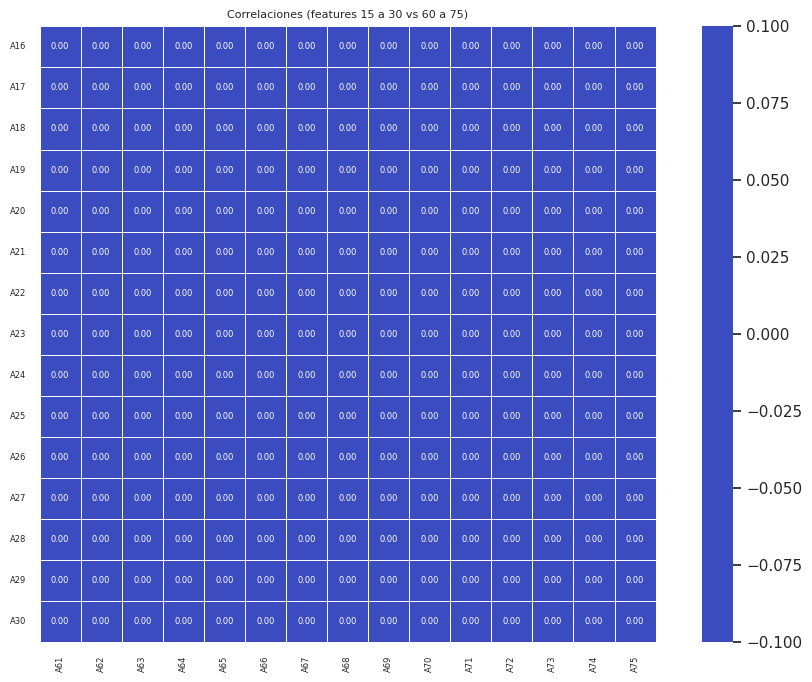

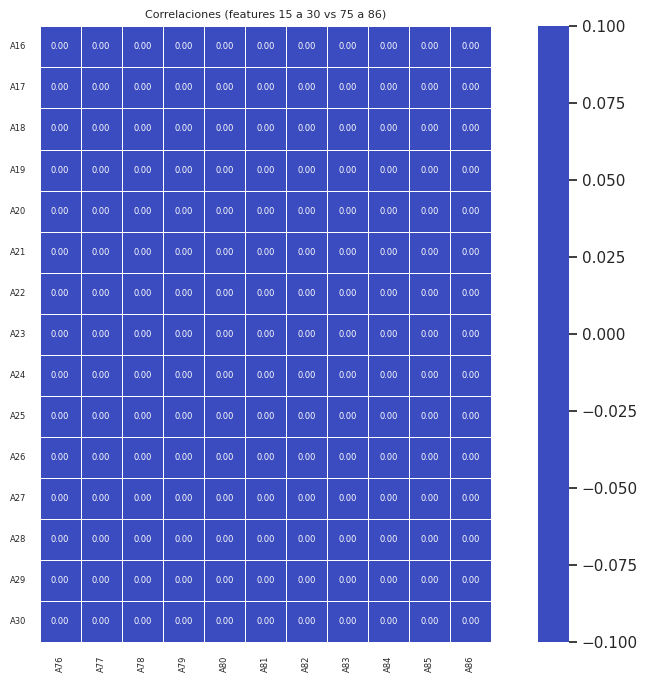

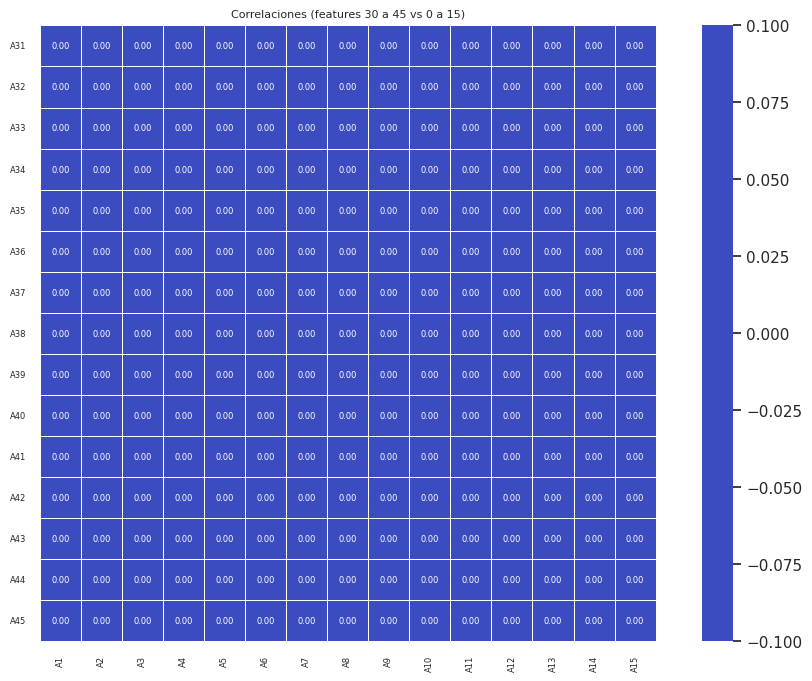

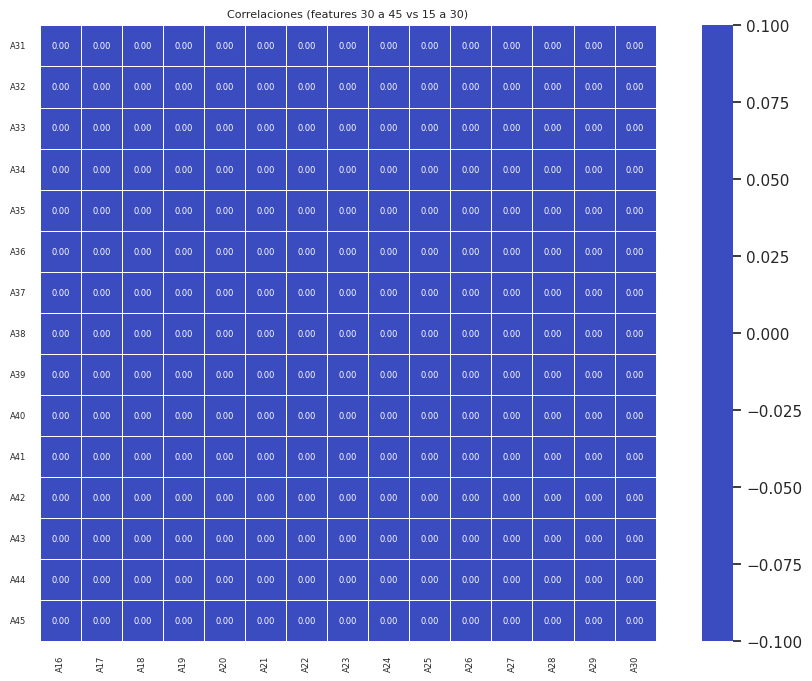

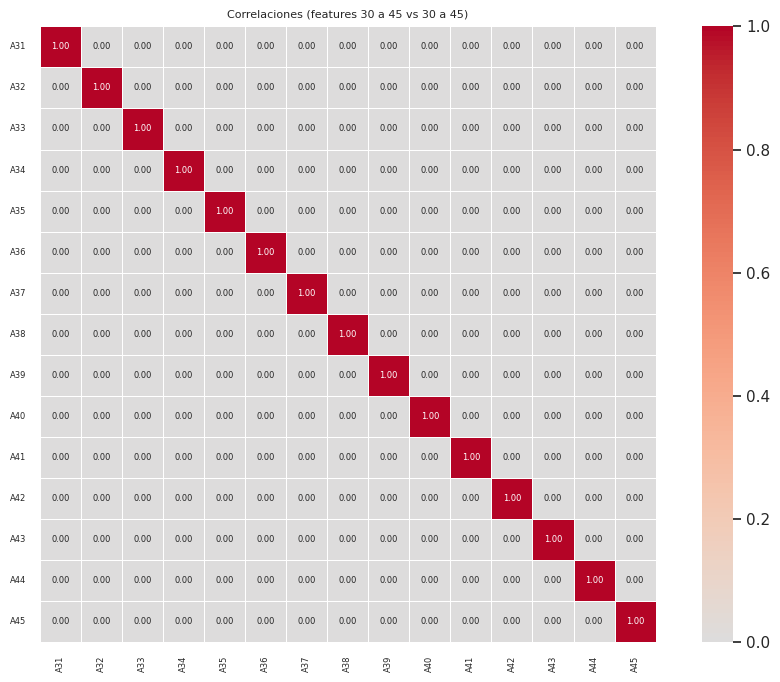

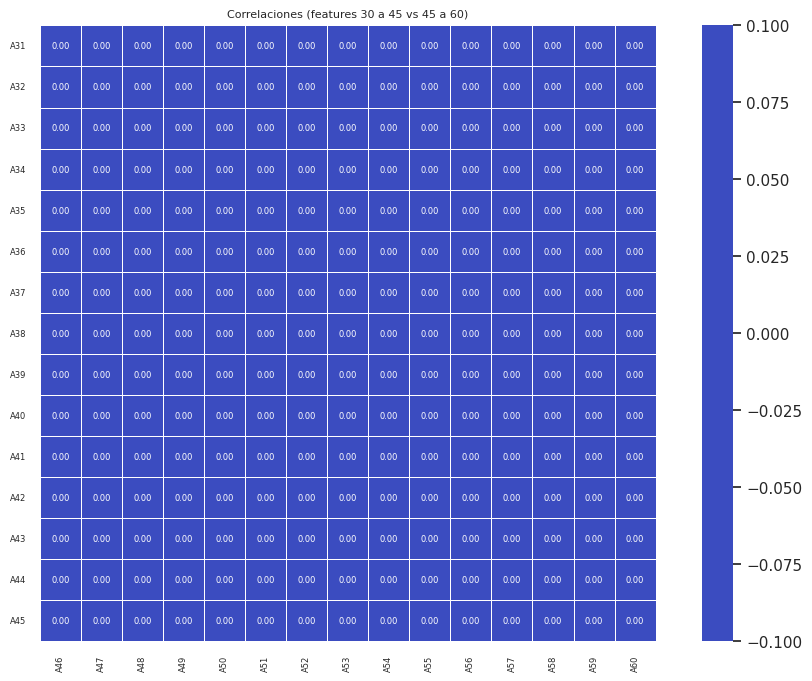

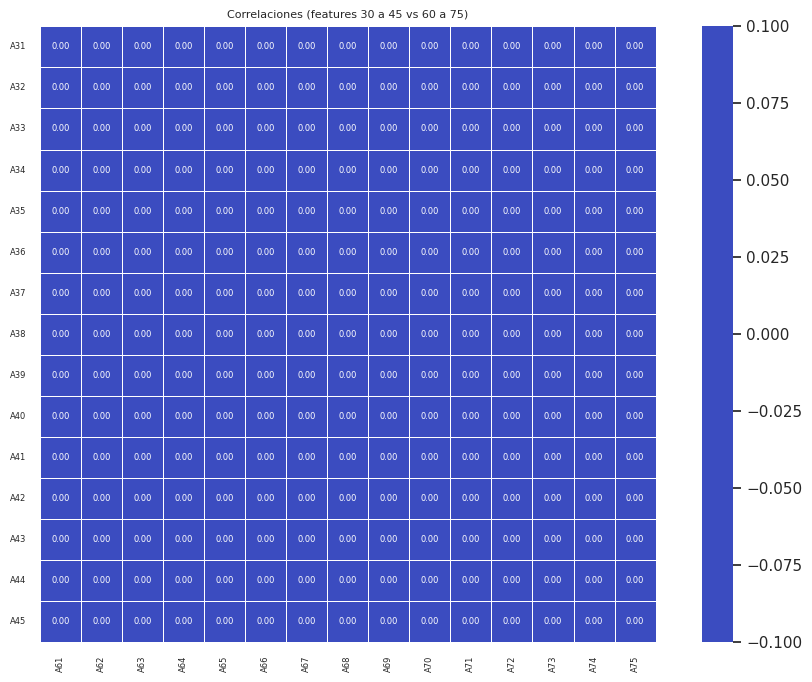

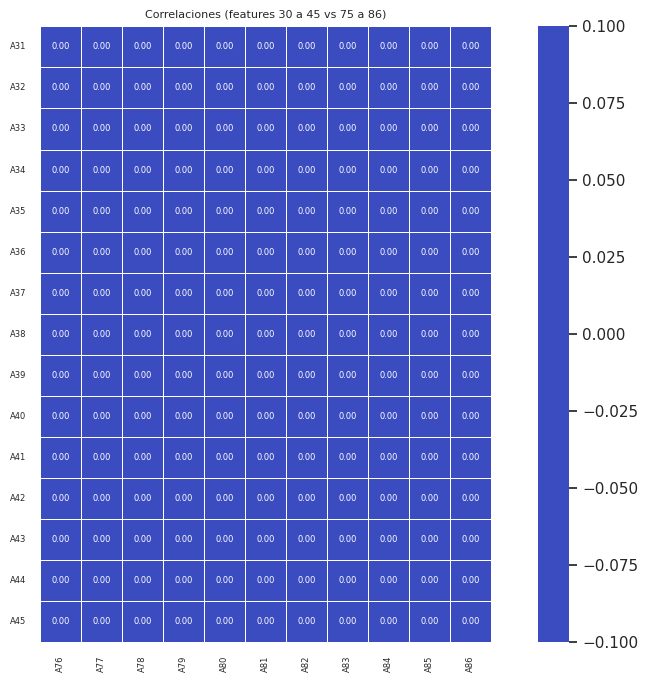

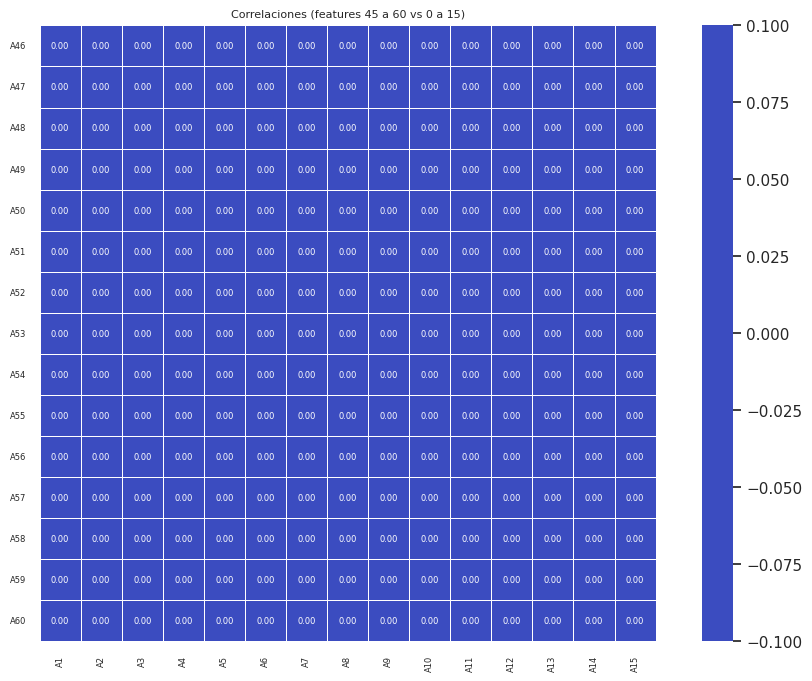

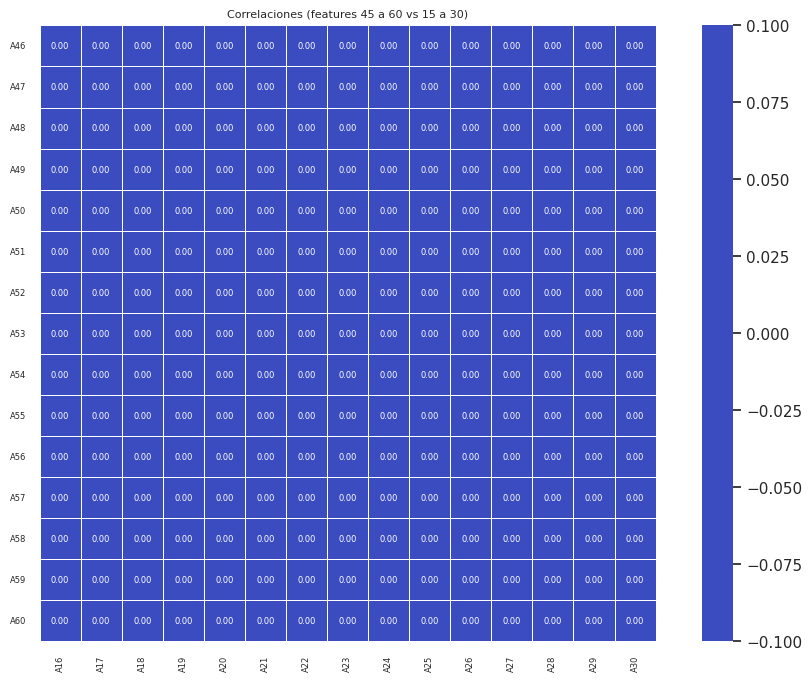

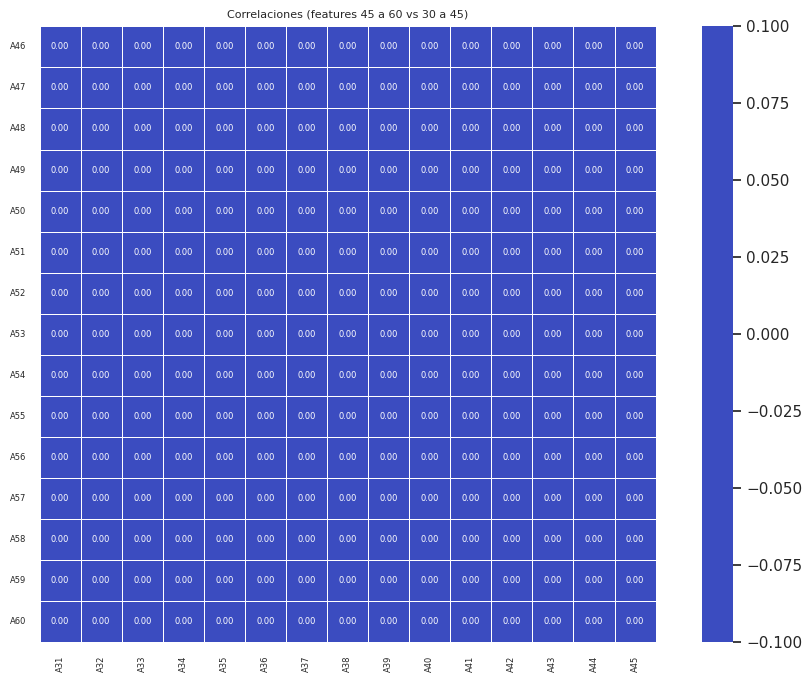

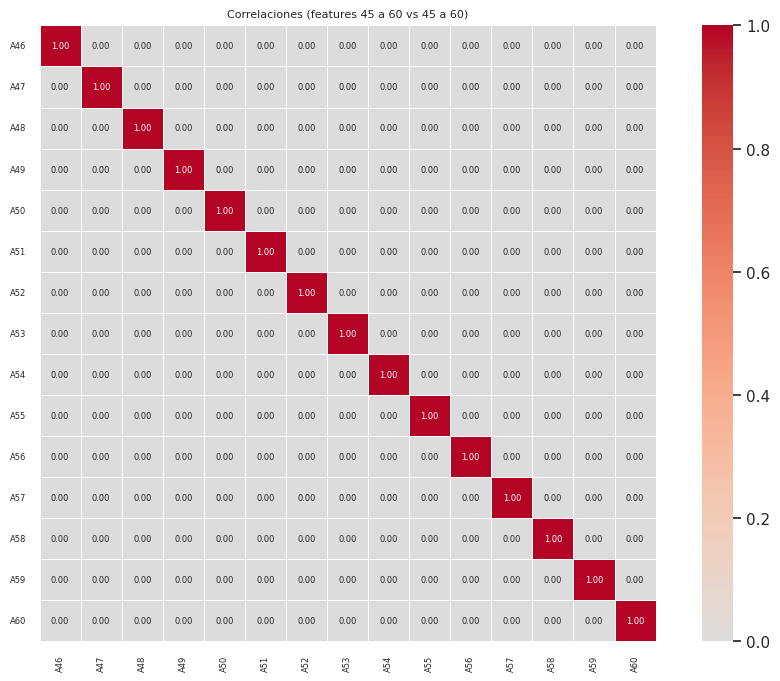

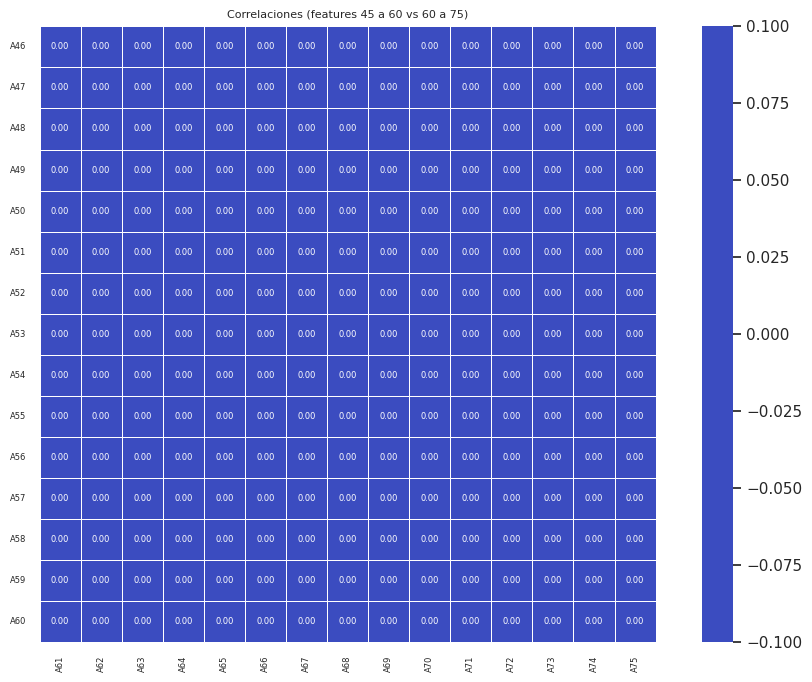

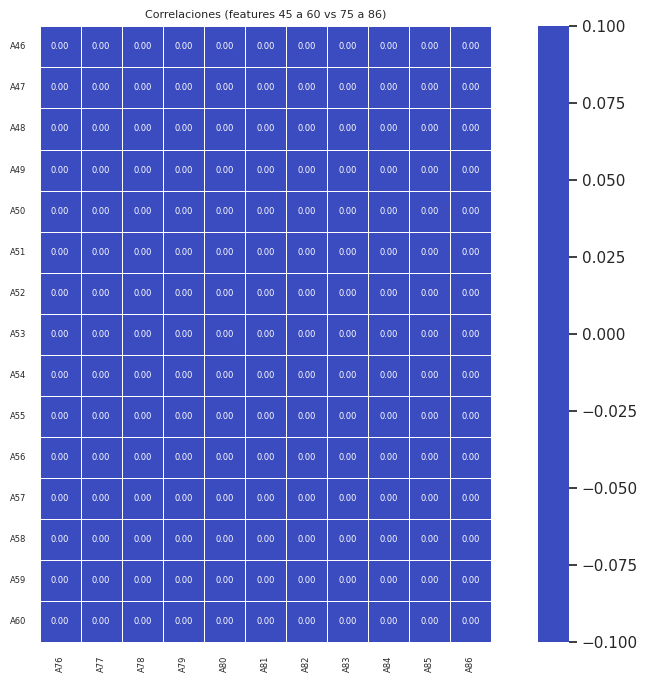

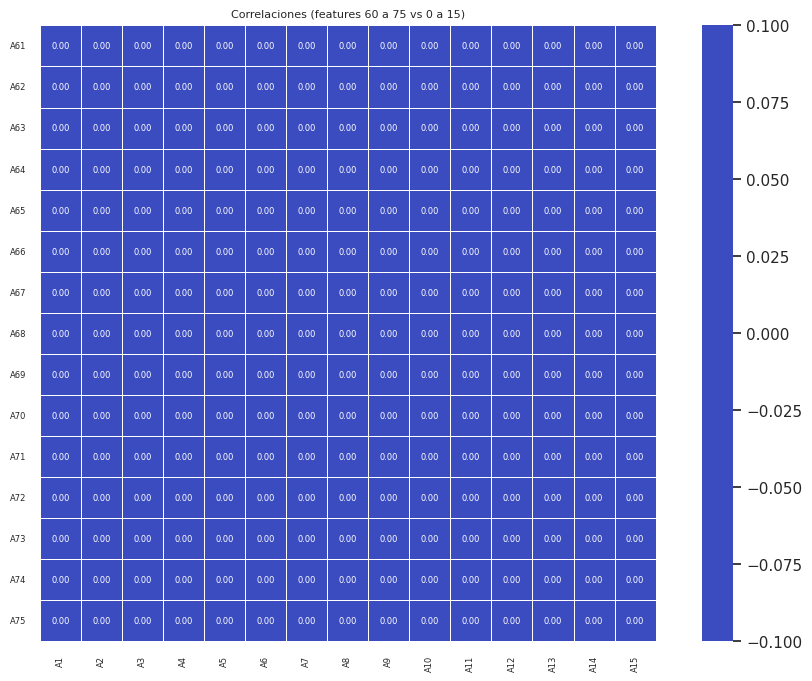

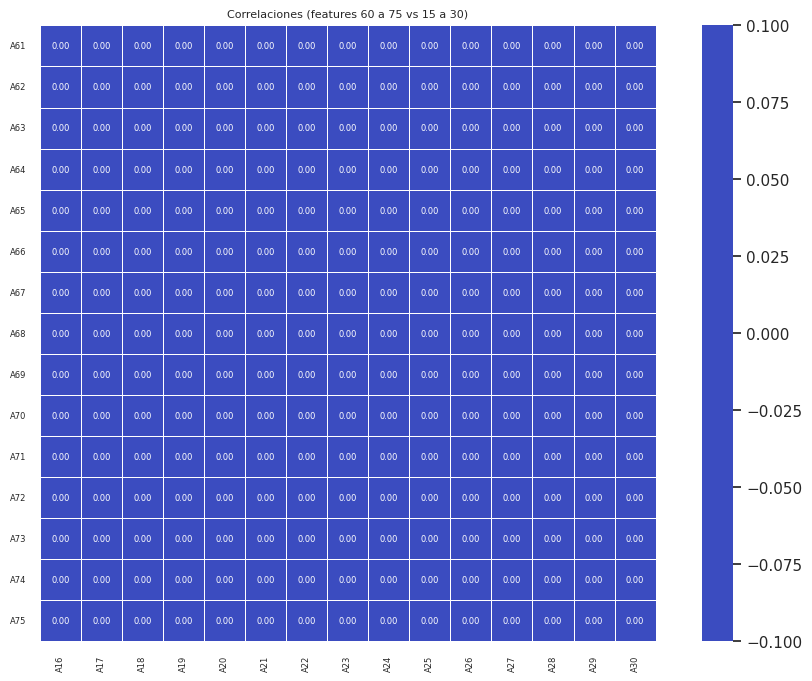

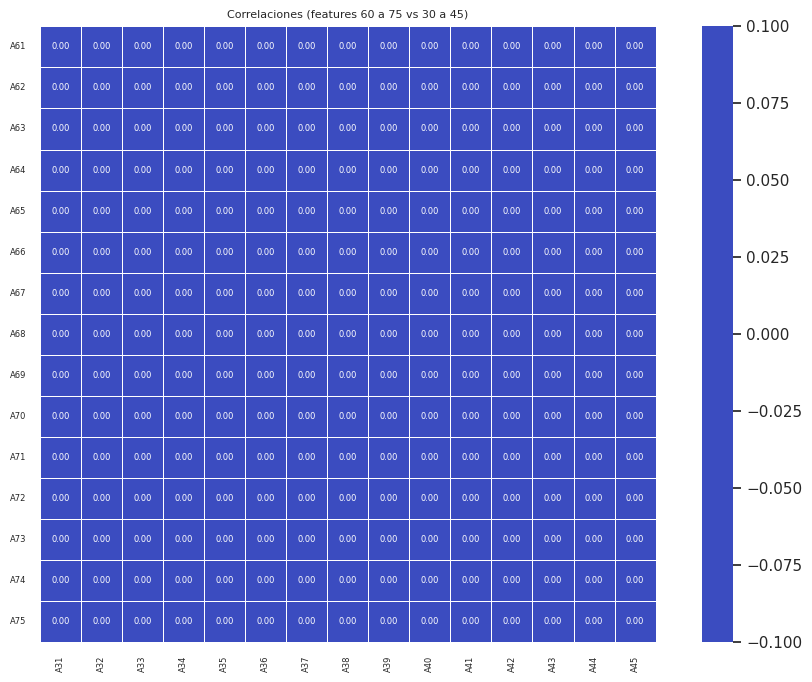

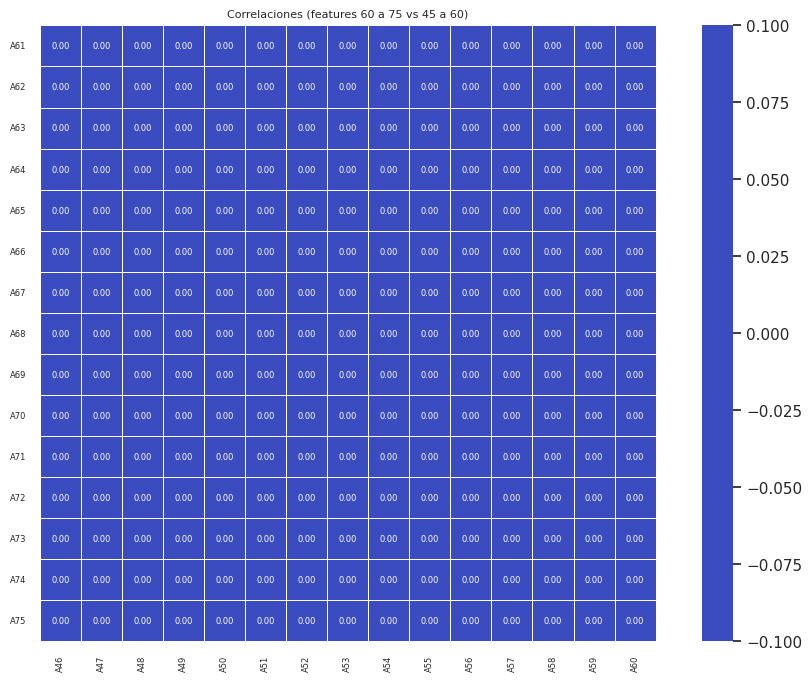

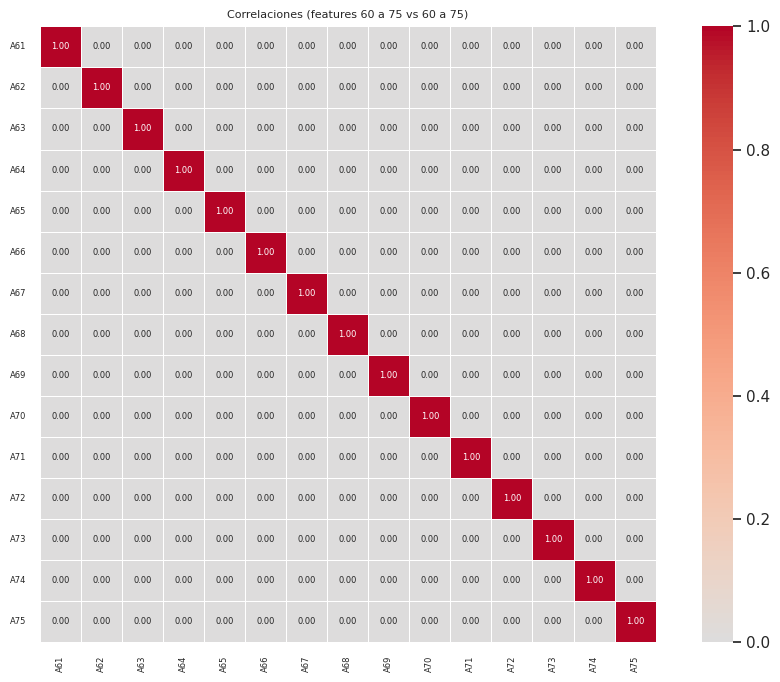

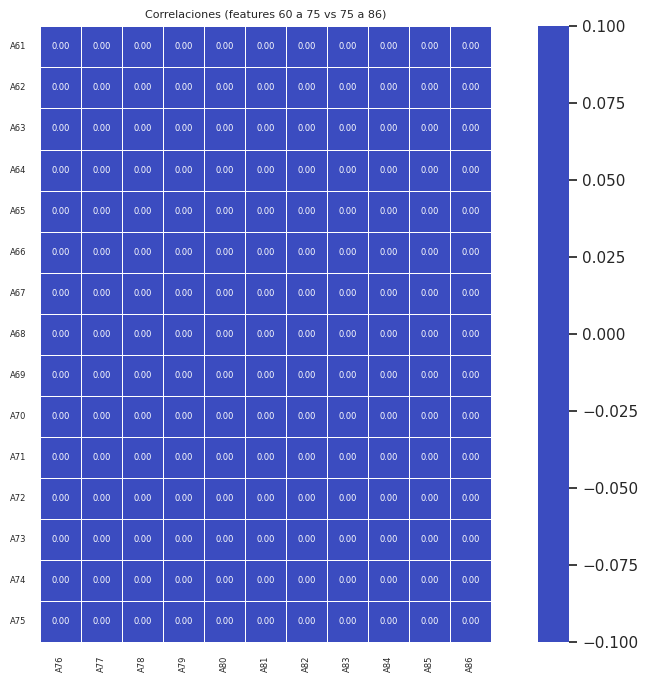

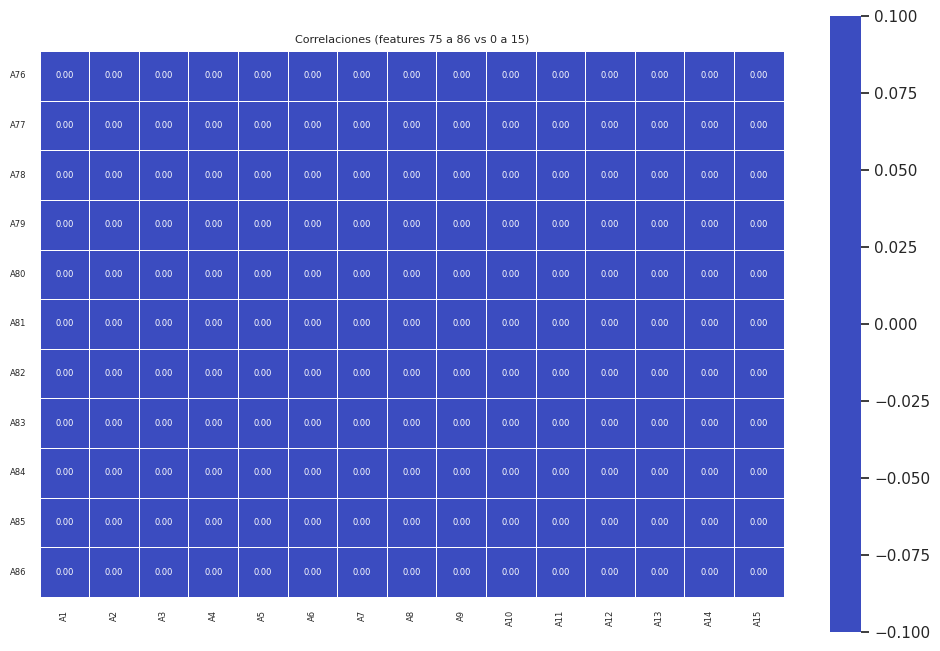

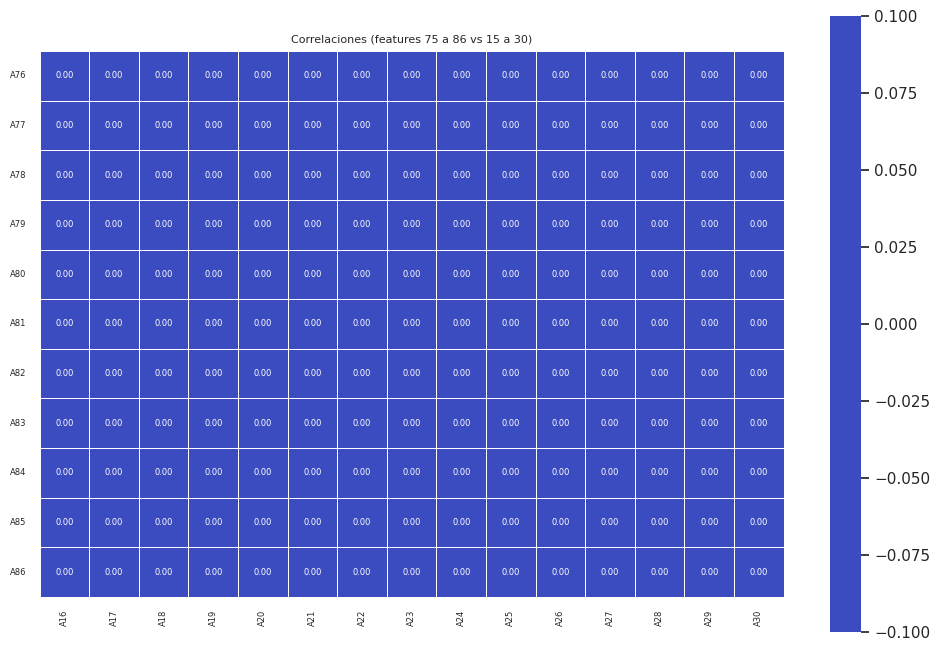

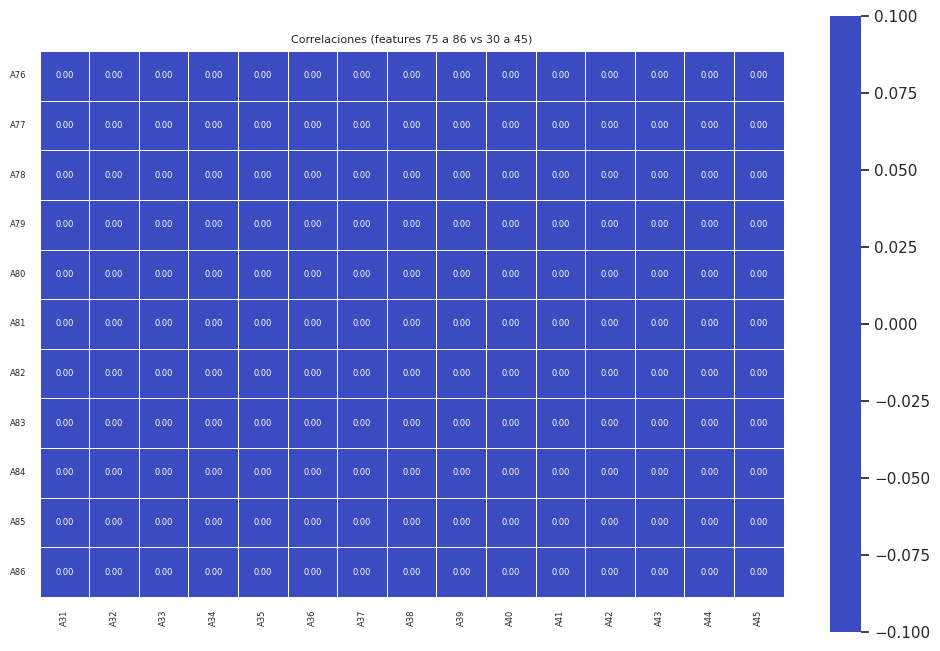

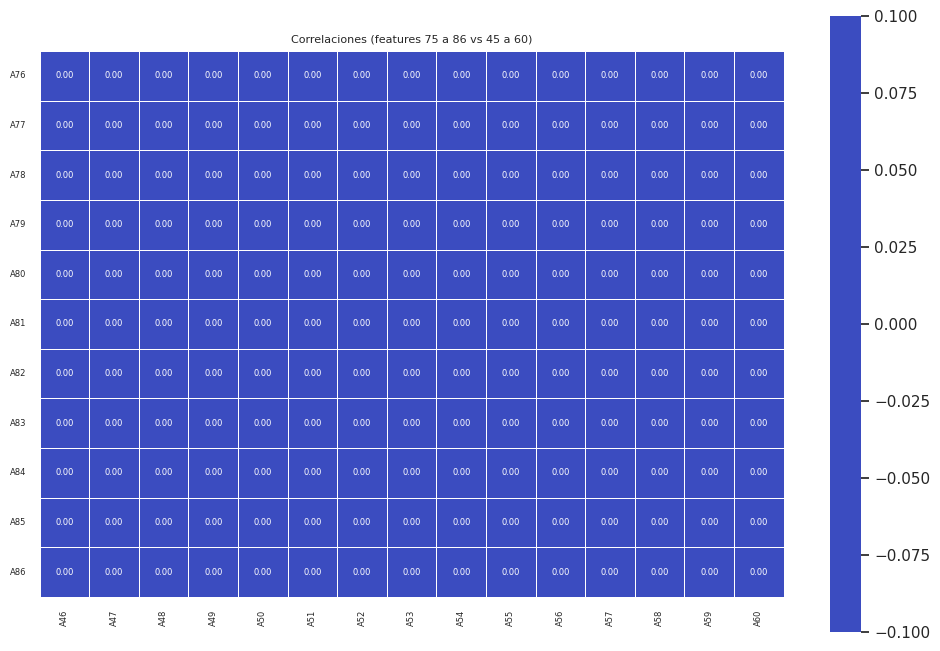

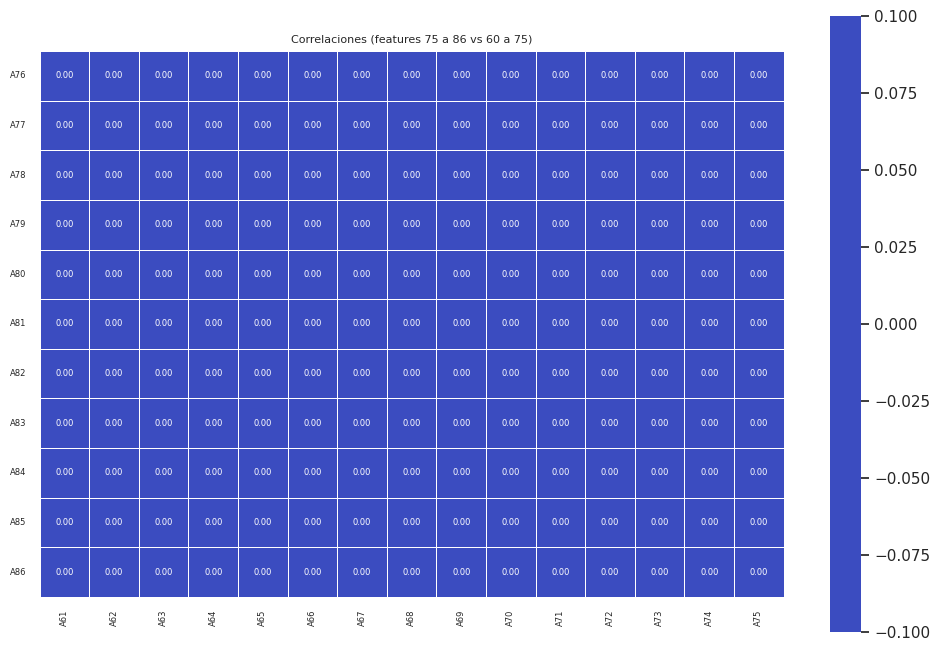

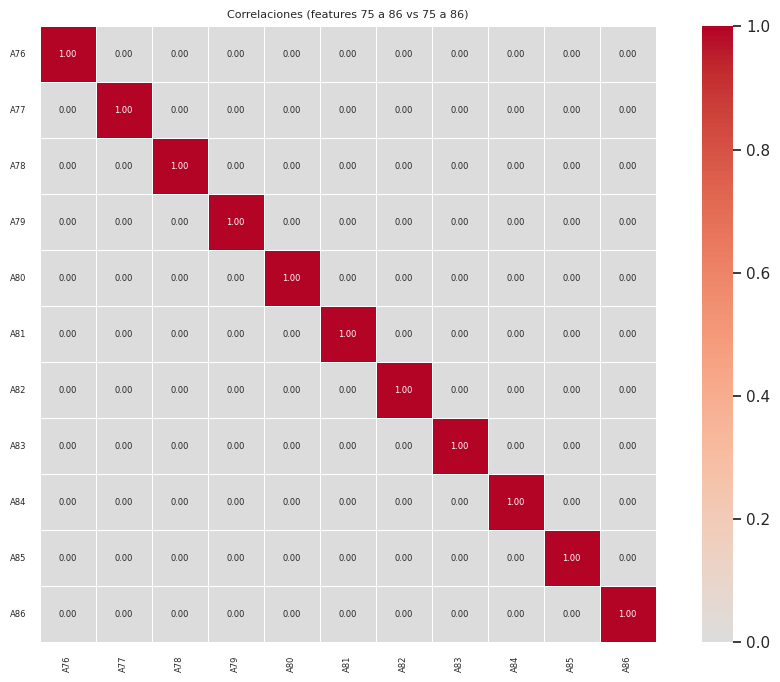

In [64]:
# Configuración
chunk_size = 15   # Número de features por bloque
threshold = 0.7   # Mostrar solo correlaciones |r| >= threshold
font_size = 6     # Tamaño de letra

# Calcular correlación
corr = df[num_cols].corr()

# Filtrar correlaciones débiles
def filter_corr(matrix, thresh):
    filtered = matrix.copy()
    filtered[(filtered < thresh) & (filtered > -thresh)] = 0
    return filtered

filtered_corr = filter_corr(corr, threshold)

# Generar heatmaps por bloques
num_features = len(num_cols)
for i in range(0, num_features, chunk_size):
    for j in range(0, num_features, chunk_size):
        corr_chunk = filtered_corr.iloc[i:i+chunk_size, j:j+chunk_size]
        plt.figure(figsize=(12, 8))
        sns.heatmap(
            corr_chunk, annot=True, fmt=".2f", cmap="coolwarm", center=0,
            cbar=True, square=True, linewidths=0.5,
            annot_kws={"size": font_size}  # tamaño de letra de los valores
        )
        plt.xticks(fontsize=font_size, rotation=90)
        plt.yticks(fontsize=font_size, rotation=0)
        plt.title(f"Correlaciones (features {i} a {min(i+chunk_size, num_features)} vs {j} a {min(j+chunk_size, num_features)})", fontsize=8)
        plt.show()

1.6 Generar Dataset limpio

In [65]:
from datetime import datetime

base_path = '/content/drive/MyDrive/coil2000_project/data/processed'
os.makedirs(base_path, exist_ok=True)

fecha = datetime.now().strftime("%Y%m%d_%H%M%S")
filename = f'dataset_tratado_{fecha}.csv'

output_path = os.path.join(base_path, filename)
df.to_csv(output_path, index=False)

print(f"Archivo guardado exitosamente en:\n{output_path}")

Archivo guardado exitosamente en:
/content/drive/MyDrive/coil2000_project/data/processed/dataset_tratado_20251012_001435.csv


**2. Separar features y target**

Distribución de CARAVAN:
A86
0    0.939545
1    0.060455
Name: proportion, dtype: Float64


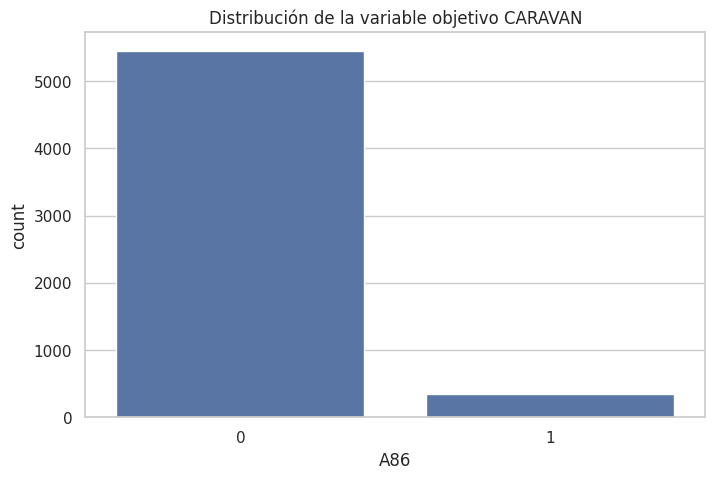

In [66]:
X = df.drop("A86", axis=1)
y = df["A86"]

# Explicación:
# Separamos las variables predictoras (X) de la variable objetivo (y) para entrenar modelos supervisados.
# CARAVAN es altamente desbalanceada (~6% positivos), por lo que debemos tener cuidado en la validación y métricas.
print("Distribución de CARAVAN:")
print(y.value_counts(normalize=True))

#ME PARECE QEU DEBEMOS ELIMINAR LA PRIMERA FILA

sns.countplot(x=y)
plt.title("Distribución de la variable objetivo CARAVAN")
plt.show()

2.1 Correlacion entre caraterísticas y variable objetivo

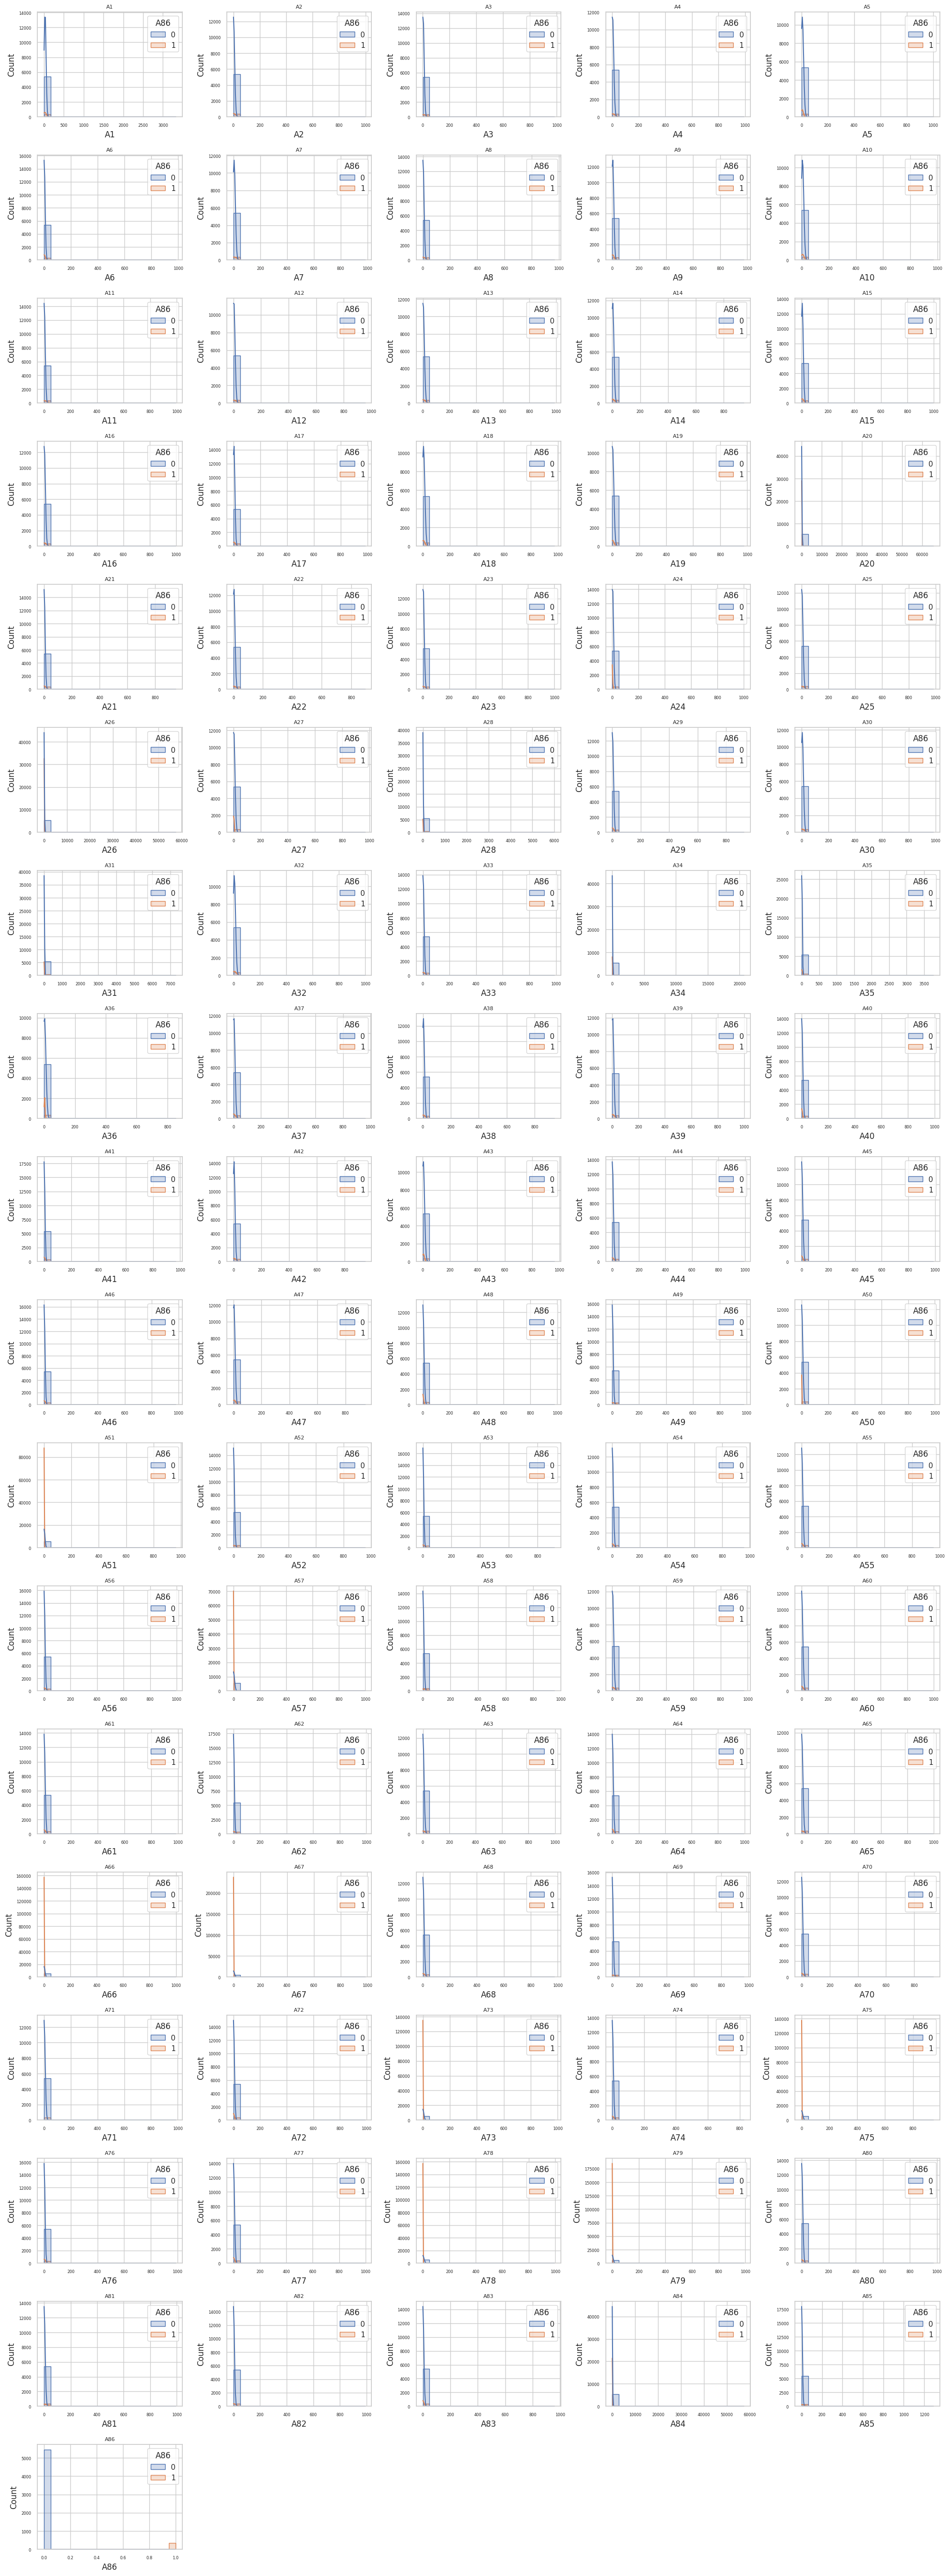

In [67]:
#for col in num_cols:
    #sns.scatterplot(x=col, y="A86", data=df)
    #plt.title(f"Relación entre {col} y CARAVAN")
    #plt.show()
    #sns.histplot(data=df, x=col, hue=y, bins=20, kde=True, element="step")
    #plt.title(f"Distribución de {col} según CARAVAN")
    #plt.show()

# Configuración de la cuadrícula
cols = 5  # número de columnas por fila
rows = math.ceil(len(num_cols) / cols)  # calcular número de filas necesarias
fig, axes = plt.subplots(rows, cols, figsize=(20, rows*3))  # tamaño total de la figura
axes = axes.flatten()  # aplanar el array de axes para iterar fácilmente

# Tamaño de letra pequeño
title_size = 8
label_size = 6

# Graficar cada feature
for i, col in enumerate(num_cols):
    sns.histplot(
        data=df, x=col, hue=y, bins=20, kde=True, element="step",
        ax=axes[i]
    )
    axes[i].set_title(f"{col}", fontsize=title_size)
    axes[i].tick_params(axis='x', labelsize=label_size)
    axes[i].tick_params(axis='y', labelsize=label_size)

# Eliminar subplots vacíos (si los hay)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**3. Identificación de variables categóricas**

In [68]:
# Muchas variables son categorías codificadas numéricamente (ej. MOSTYPE, APERSAUT).
# Aplicar OneHotEncoder ayuda a que modelos lineales o basados en distancias puedan interpretarlas correctamente.
categorical_features = [f"A{i}" for i in range(1, 44)]  # sociodemográficas
categorical_features += [f"A{i}" for i in range(44, 86)]  # productos de seguros

# Ejemplo de algunas variables relevantes
print("Ejemplo de columnas sociodemográficas y de productos:")
print(df[["A1", "A2", "A43", "A44", "A85"]].head())

# Explicación:
# Convertimos estas variables en binarias (dummy) para que la regresión logística pueda capturar relaciones entre cada categoría y la probabilidad de CARAVAN=1.

Ejemplo de columnas sociodemográficas y de productos:
     A1   A2  A43  A44  A85
0  37.0  1.0  4.0  2.0  0.0
1  37.0  1.0  4.0  2.0  0.0
2   9.0  1.0  4.0  0.0  0.0
3  40.0  1.0  3.0  0.0  0.0
4  23.0  1.0  3.0  0.0  0.0


**4. División en train y validation**

In [69]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Explicación:
# Separamos 20% de los datos para validación.
# stratify=y asegura que la proporción de positivos/negativos se mantenga en ambos conjuntos.
print("Proporción en entrenamiento:", y_train.value_counts(normalize=True))
print("Proporción en validación:", y_val.value_counts(normalize=True))
#print("Proporción en entrenamiento:", y_train.value_counts(normalize=True).to_dict())
#print("Proporción en validación:", y_val.value_counts(normalize=True).to_dict())

Proporción en entrenamiento: A86
0    0.939492
1    0.060508
Name: proportion, dtype: Float64
Proporción en validación: A86
0    0.939759
1    0.060241
Name: proportion, dtype: Float64


**5. Pipeline de preprocesamiento y modelado**

In [70]:
# Preprocesamiento:
# - OneHotEncoder para variables categóricas.
# - StandardScaler opcional para modelos sensibles a escala (LogisticRegression).
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Creamos pipeline con LogisticRegression
# class_weight="balanced" ayuda a que la clase minoritaria tenga más peso en el entrenamiento.
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced", random_state=42))
])

# Explicación:
# La pipeline asegura que los mismos pasos de transformación se aplican a train y validation, manteniendo reproducibilidad y evitando fugas de datos.
# El preprocesamiento mejora la capacidad del modelo de capturar la relación de cada categoría con la variable objetivo.




**6. Entrenar LogisticRegression**

Classification Report - Logistic Regression Mejorado:
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      1092
         1.0       0.15      0.40      0.22        70

    accuracy                           0.83      1162
   macro avg       0.55      0.63      0.56      1162
weighted avg       0.91      0.83      0.86      1162

ROC-AUC: 0.6880821559392989


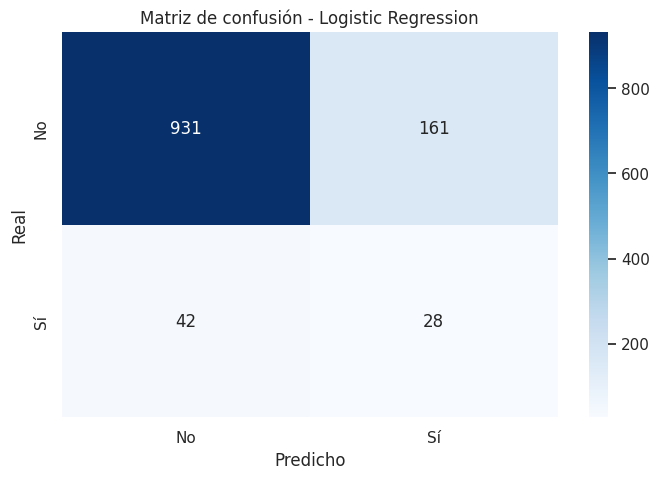

In [71]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_val)
y_proba = pipeline.predict_proba(X_val)[:,1]

print("Classification Report - Logistic Regression Mejorado:")
print(classification_report(y_val, y_pred))

roc_auc = roc_auc_score(y_val, y_proba)
print("ROC-AUC:", roc_auc)

# Matriz de confusión
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Sí"], yticklabels=["No", "Sí"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de confusión - Logistic Regression")
plt.show()

**7. Evaluación de métricas**

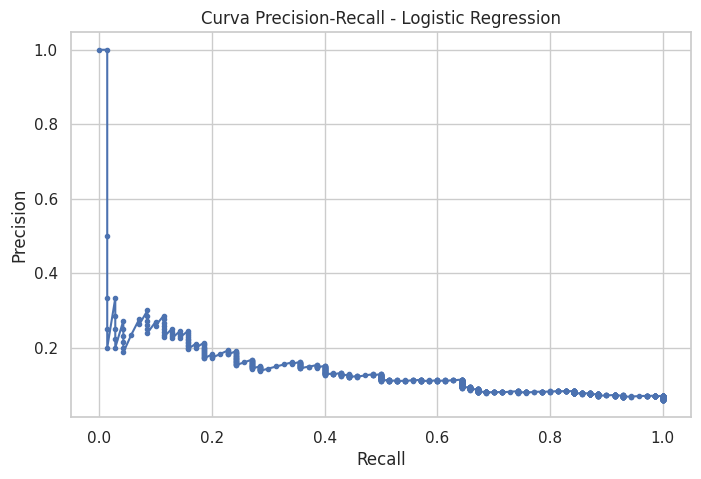

In [72]:
# Gráfico Precision-Recall para evaluar desempeño en clase minoritaria
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_val, y_proba)
plt.plot(recall, precision, marker=".")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Curva Precision-Recall - Logistic Regression")
plt.show()

# Explicación:
# La curva Precision-Recall ayuda a entender el trade-off entre recuperar más positivos (recall)
# y cometer menos falsos positivos (precision).
# Muy relevante en este dataset porque la clase positiva es muy pequeña.

8. Baseline DummyClassifier

In [73]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_val)

print("Classification Report - DummyClassifier:")
print(classification_report(y_val, y_dummy_pred))

# Explicación:
# DummyClassifier sirve como benchmark para medir si el modelo entrenado realmente aporta valor sobre la estrategia trivial de predecir siempre la clase mayoritaria.


Classification Report - DummyClassifier:
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1092
         1.0       0.00      0.00      0.00        70

    accuracy                           0.94      1162
   macro avg       0.47      0.50      0.48      1162
weighted avg       0.88      0.94      0.91      1162



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 **9. Exploración adicional de atributos**


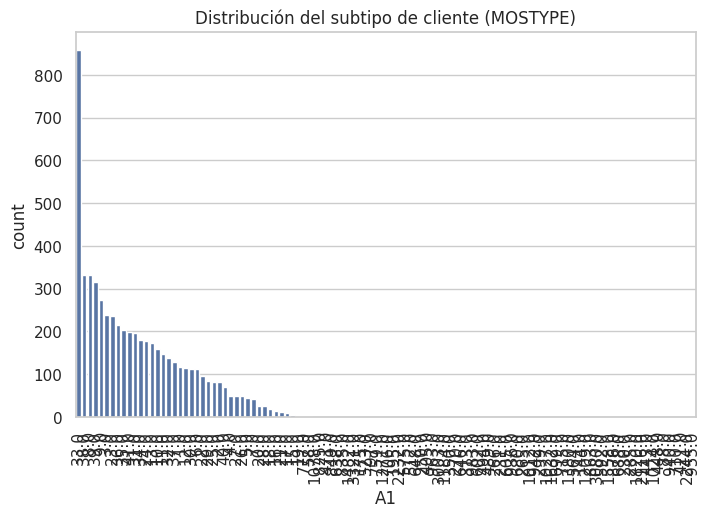

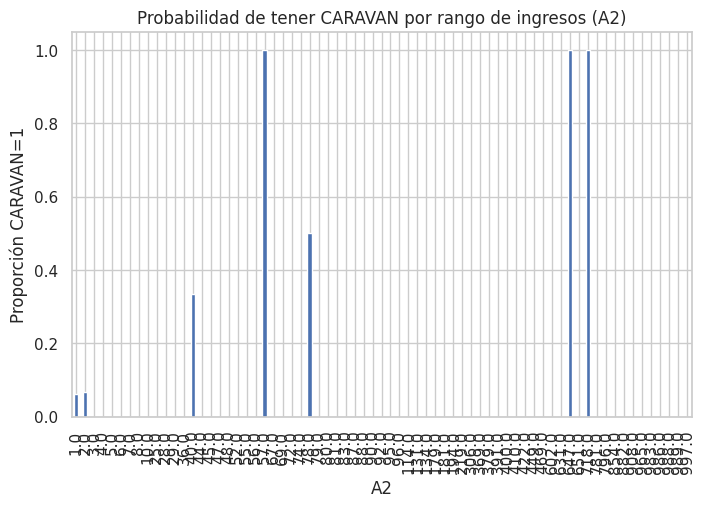

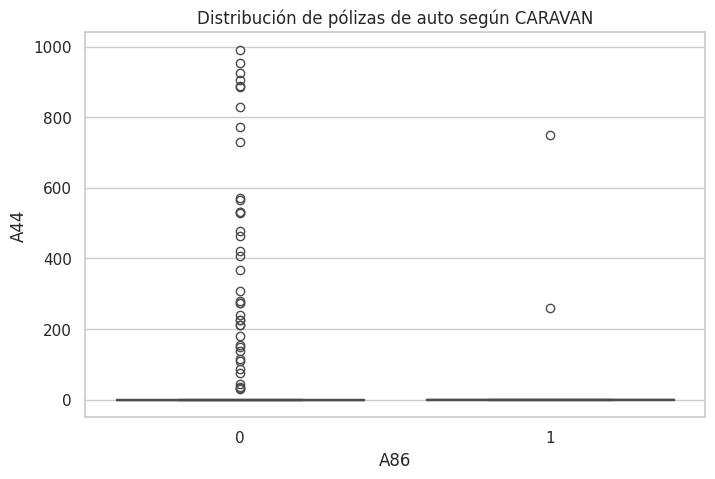

In [74]:
# Ejemplo: distribución del subtipo de cliente (A1 = MOSTYPE)
sns.countplot(x=X["A1"], order=X["A1"].value_counts().index)
plt.title("Distribución del subtipo de cliente (MOSTYPE)")
plt.xticks(rotation=90)
plt.show()

# Relación de ingresos (ej. A2 = rango de ingresos) con la variable CARAVAN
income_caravan = df.groupby("A2")["A86"].mean()
income_caravan.plot(kind="bar")
plt.title("Probabilidad de tener CARAVAN por rango de ingresos (A2)")
plt.ylabel("Proporción CARAVAN=1")
plt.show()

# Ejemplo: número de pólizas de auto (A44 = APERSAUT)
sns.boxplot(x=y, y=X["A44"])
plt.title("Distribución de pólizas de auto según CARAVAN")
plt.show()

# Explicación:
# Estas visualizaciones permiten al área de negocio entender qué segmentos de clientes
# (subtipos, ingresos, otros productos contratados) tienen mayor propensión a adquirir
# la póliza de casa rodante. Sirve para planear campañas de marketing dirigidas.